##José Antonio Pacheco

#Objetivo SMART: Determinar la evolución de los temas de interés en Twitter (mediante hashtags de los tweets de los usuarios) a lo largo del tiempo durante la pandemia de Covid-19.

- Específico: Utilizar los hashtags de cada tweet de la base de datos para determinar cuáles son los más usados durante un tiempo determinado de la pandemia de Covid19.

- Medible: Se determinarán los hashtags o temas más populares cuando superen un valor determinado de en cuántos tweets aparezca ese hashtag.

- Alcanzable: Se emplearán herramientas para el análisis de datos aprendidos en el curso para poder determinar la popularidad de los temas en Twitter en un contexto determinado.

- Relevante: Se busca aplicar el conocimiento adquirido en el curso y poner a prueba el criterio para interpretar los datos, y así alcanzar la subcompetencia "SING0202A ", que busca determinar la interacción existente entre dos variables.

- A tiempo: Se estima que la resolución de este reto tomará menos de 8 horas en total. Lo cual es tiempo suficiente para presentarlos a las 12:00pm del dÃ­a siguiente.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [106]:
data = pd.read_csv("covid19_tweets.csv")
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


In [107]:
data.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [108]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [109]:
data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False
74435,Your Friend & Sabre ⚔️,"Chicago, IL",My spectral decomposition has a significant da...,2016-12-19 19:55:00,310,1748,60133,False,2020-08-04 03:13:15,MAGA: #COVID19 is just a cold &amp; it'd be go...,"['COVID19', 'Hydroxycholoroquine']",Twitter for Android,False


Para determinar los temas más relevantes en Twitter durante la pandemia de Covid19, tomaremos como estándar más de 1000 tweets dentro de toda la base de datos en los que cada tema haya sido mencionado en hashtags. No tomaremos en cuenta aquellos temas que no hayan sido mencionados en hashtags en menos de 1000 tweets en nuestra base de datos, ya que esta presenta un total de 74436 tweets, y aquellos temas presentes en menos de 1000 tweets son irrelevantes.

In [110]:
# Obtenemos todos los tweets relacionados con el Covid19 = 42673

data = data.fillna("")
dataframecovid = data[data["hashtags"].str.contains("COVID19") | data["hashtags"].str.contains("covid19") | data["hashtags"].str.contains("coronavirus") | data["hashtags"].str.contains("CORONAVIRUS") | data["hashtags"].str.contains("Covid19") | data["hashtags"].str.contains("CoronaVirus")] 
dataframecovid

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74430,Jimmy Slamat,"Los Angeles, CA",I follow the market and all it’s astounding ev...,2009-08-06 08:39:31,49,82,281,False,2020-08-04 03:13:29,"So maybe Sweden did do it right, by doing noth...","['COVID19', 'coronavirus']",Twitter for iPhone,False
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74434,M0ser,,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


In [111]:
# Obtenemos todos los tweets relacionados con los cubrebocas/mascarillas = 1414

data = data.fillna("")
dataframemask = data[data["hashtags"].str.contains("facemask") | data["hashtags"].str.contains("mask") | data["hashtags"].str.contains("FACEMASK") | data["hashtags"].str.contains("MASK") | data["hashtags"].str.contains("Facemask") | data["hashtags"].str.contains("Mask")] 
dataframemask

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
71,BestValueButtons,"Denver, CO",We are a fabric outlet and specialty button Et...,2018-05-30 19:45:27,1267,2869,1204,False,2020-07-25 12:25:11,Check out Angel's beautiful mask and hair bow ...,"['etsy', 'epiconetsy', 'masksforsale']",IFTTT,False
103,Thomas Faires,"Toronto, Ontario, Canada","...yup, still a husband, vegetarian, computer ...",2011-04-14 12:36:09,738,143,28004,False,2020-07-25 12:24:10,1.28% of the U.S. population is infected with ...,"['COVID19', 'TrumpVirus', 'MaskItOrCasket']",Twitter for iPhone,False
147,Illustrated London,,Buy a print for your wall and look out onto an...,2020-07-25 12:04:11,1,13,0,False,2020-07-25 12:23:03,Mask Print #1 (Londoners Wear Masks) https://t...,"['MaskUp', 'mask', 'Masks', 'MaskMoaners', 'CO...",Twitter Web App,False
169,"Christine Murphy Estes, MM, MA, CCC-SLP","New York, NY","Speech-Language Pathologist, Voice Specialist,...",2018-10-07 02:31:06,622,1220,1121,False,2020-07-25 12:21:51,Your friendly weekend reminder that COVID didn...,"['wearamask', 'covid', 'covid19']",Twitter for iPhone,False
212,coley,"Grays, England","26, Essex UK. bearded. long haired. engaged. p...",2015-12-11 22:20:21,33,188,108,False,2020-07-25 12:20:36,STOP FOGGY GLASSES WITH THIS HACK!!!!!! #COVID...,"['COVID19', 'facecoverings', 'maskproblems', '...",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74289,A Voice For Choice Advocacy,,,2015-05-22 02:58:19,7409,658,2665,False,2020-08-04 03:19:00,I Read the #Mask Box WARNING to People at @Wal...,"['Mask', 'Covid19', 'BitChute']",TweetDeck,False
74364,The Bright Flame Official,,"The Bright Flame is a Bible-based, male-centri...",2020-06-10 21:29:20,2,0,0,False,2020-08-04 03:15:45,Email Sent! Masks Endanger The Childrens Futur...,"['masks', 'covid']",Twitter for iPhone,False
74385,Naya Z.,Everywhere,iSing•iWrite•iPromote love & cuss words•Stream...,2009-08-04 15:59:53,3111,126,538,False,2020-08-04 03:14:59,He’s sick of y’all’s sh*t!! \n#wearyodamnmask ...,"['wearyodamnmask', 'covid19', 'thepandemicisnt...",Instagram,False
74394,Karen Cookson,California Baby,"Computer person by trade, politics buff for fu...",2009-03-25 03:20:33,84,366,1150,False,2020-08-04 03:14:45,You think wearing a mask is uncomfortable try ...,"['wearamask', 'covid19', 'ventilator']",Instagram,False


In [112]:
# Obtenemos todos los tweets relacionados con Donald Trump = 1215

data = data.fillna("")
dataframetrump = data[data["hashtags"].str.contains("TRUMP") | data["hashtags"].str.contains("trump") | data["hashtags"].str.contains("Trump")] 
dataframetrump

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
103,Thomas Faires,"Toronto, Ontario, Canada","...yup, still a husband, vegetarian, computer ...",2011-04-14 12:36:09,738,143,28004,False,2020-07-25 12:24:10,1.28% of the U.S. population is infected with ...,"['COVID19', 'TrumpVirus', 'MaskItOrCasket']",Twitter for iPhone,False
234,BeautifulSkinYourIn,,"Daily Tips from our Nurses, Dietitians, Aesthe...",2016-11-17 14:30:31,2401,3053,69,False,2020-07-25 12:20:00,WORLD #NEWS #TODAY SHORTENED FOR BUSY PEOPLE\n...,"['NEWS', 'TODAY', 'politics', 'trump', 'money'...",Twitter for Advertisers,False
412,marklaverdure,Los Angeles & Billings,I have passion for living life to it's fullest...,2011-03-04 15:17:55,10078,10316,19623,False,2020-07-25 12:13:53,@realDonaldTrump #trumpdeathtoll147K 4.2 Milli...,"['trumpdeathtoll147K', 'COVID19', 'TrumpVirusC...",Twitter Web App,False
437,Mx. Joe~Anthony Sierra Let us pray #COVID19 away,#StGeorge~#StatenIsland~#NYC,Hope to be insightful,2013-05-03 03:46:03,355,228,3685,False,2020-07-25 12:13:05,#Hope #USA #Trump vilifying #USPS &amp; #Amazo...,"['Hope', 'USA', 'Trump', 'USPS', 'Amazon', 'Po...",Twitter Web App,False
448,marklaverdure,Los Angeles & Billings,I have passion for living life to it's fullest...,2011-03-04 15:17:55,10078,10316,19623,False,2020-07-25 12:12:49,@realDonaldTrump Remember the #WorstPresidentI...,"['WorstPresidentInHistory', 'trumpdeathtoll147...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74313,Mindcite💥,"New York, NY",Beyond Memes... Firing up fascism-RESISTant cr...,2016-01-15 22:59:56,3349,3741,13133,False,2020-08-04 03:18:00,Official: The most nonpartisan Public Safety M...,"['COVID19', 'TrumpLiesPeopleDie']",Twitter Web App,False
74340,Crinklybum,United States,"Genealogy, History, Traveler, USAF Veteran",2012-08-29 03:34:50,523,1019,127295,False,2020-08-04 03:16:52,@HillaryWarnedUs Where is the #TrumpGestapo to...,"['TrumpGestapo', 'COVID19']",Twitter for iPhone,False
74351,FDMillet,"Maine, USA",You have to disturb the soil to grow a garden....,2011-09-15 12:20:19,2584,2155,6487,False,2020-08-04 03:16:30,#Trump and the #GOP’s #coronavirus aid coronav...,"['Trump', 'GOP', 'coronavirus']",Twitter Web App,False
74357,Said Pulido,Mexico City,"Periodista & Fotógrafo (Negocios, Responsabili...",2011-04-21 02:56:31,9923,4638,3996,False,2020-08-04 03:16:00,President Donald #Trump criticized Dr. Deborah...,"['Trump', 'Birx', 'COVID19']",Twitter for iPhone,False


In [113]:
# Creamos un dataframe solamente para ver en cuántos tweets no se usaron hashtags = 21434
dataframenot = data.loc[(data["hashtags"]=="")]
dataframenot

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,,Twitter for Android,False
7,Derbyshire LPC,,,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,,TweetDeck,False
10,Voice Of CBSE Students,,,2020-07-14 17:50:30,8,10,7,False,2020-07-25 12:26:53,49K+ Covid19 cases still no response from \n@c...,,Twitter Web App,False
14,DailyaddaaNews,New Delhi,Breaking news alerts from India.,2016-10-22 09:18:42,546,29,88,False,2020-07-25 12:26:46,Rajasthan Government today started a Plasma Ba...,,Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74404,Aaronius,,"software guy ☕️, tech nut 💻, dad 👨‍👩‍👧‍👦, and ...",2008-11-30 04:17:19,17,188,19,False,2020-08-04 03:14:29,Let’s agree that if you choose NOT to wear a m...,,Twitter for iPhone,False
74416,Chelsea Ruchalski🏳️‍🌈🌈🖤🧛‍♀️🍑 ~ Respect Hwasa,WhereverMyImaginationDecides,Day-walker vampire & aspiring Entertainment CE...,2009-04-01 12:36:46,1676,4316,128596,False,2020-08-04 03:14:06,Next was the railroad tracks.\nI love travel &...,,Twitter for Android,False
74417,Phil,"Arizona, USA",Eduknowlogist believes EdTech solutions can cl...,2007-04-19 09:21:58,1184,295,179747,False,2020-08-04 03:14:03,Public panic and media scorn are shutting down...,,Twitter Web App,False
74425,The Light In Life,Earth,Showcasing the finer things in life - unlike t...,2011-08-29 11:45:56,2084,3115,56834,False,2020-08-04 03:13:45,"yes use digital better, but also STOP HARVESTI...",,Twitter Web App,False


In [114]:
# Obtenemos todos los tweets relacionados con otros temas = 7700

len(data.iloc[:, 8]) -len(dataframenot.iloc[:, 8]) - len(dataframecovid.iloc[:, 8]) - len(dataframemask.iloc[:, 8]) - len(dataframetrump.iloc[:, 8])

7700

La base de datos con la que estamos trabajando solamente tiene datos de tweets escritos desde el 25 de julio de 2020 hasta el 4 de agosto de ese año, los cuales son solamente 11 días.

Podemos obtener las menciones de cada tema relevante elegido por hashtags por cada uno de estos días.

In [116]:
# Obtenemos los tweets sobre Covid19 escritos el 25 de julio de 2022

dataframecovid_25jul = dataframecovid[dataframecovid["date"].str.contains("2020-07-25")] 
dataframecovid_25jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16871,Ontario Native Women's Association,"Ontario, Canada",A Voice for Indigenous Women's Issues,2012-03-06 21:45:44,3587,799,804,False,2020-07-25 00:00:00,#Talk4Healing IS STILL HERE TO HELP!\nTheir to...,"['Talk4Healing', 'COVID19']",TweetDeck,False
16872,ABS-CBN News Channel,Philippines,News updates & breaking news from the Philippi...,2009-06-04 21:26:24,4997498,770,5423,True,2020-07-25 00:00:00,The #COVID19 pandemic is expected to reverse g...,['COVID19'],TweetDeck,False
16873,Link TV,"Los Angeles, CA","Global news, uncompromising documentaries, and...",2008-08-11 17:10:48,11806,1868,1539,True,2020-07-25 00:00:00,Indigenous groups in Ecuador’s #Amazon launch ...,"['Amazon', 'COVID19']",TweetDeck,False
16878,Texas Watch,"Austin, TX",Restoring responsibility. Protecting families.,2008-12-08 23:11:47,2578,1331,22,False,2020-07-25 00:00:00,Wear because you care.\n\nWe can control the s...,"['covid19', 'txlege']",Twitter Media Studio,False


In [ ]:
# Obtenemos los tweets sobre Covid19 escritos el 26 de julio de 2022

dataframecovid_26jul = dataframecovid[dataframecovid["date"].str.contains("2020-07-26")] 
dataframecovid_26jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
17176,"Mr. Toro Güero, #WearAMask #HighTransmissibility",Blocked by @RealJamesWoods,*Blunt* #Agave #advocate #diffusist #tequila #...,2010-12-08 06:21:51,2461,1586,10362,False,2020-07-26 09:33:31,Bravo sir. You're fast becoming one of the wor...,"['Mexico', 'failedpresident', 'covid19']",Twitter Web App,False
17179,Afrobodies,South Africa,South African recombinant alpaca antibody prod...,2015-08-20 19:10:38,195,412,66,False,2020-07-26 09:33:22,Report coming from the UK which may have impor...,['COVID19'],Twitter for Android,False
17181,ChinAfrica Magazine - South Africa,,China's only monthly magazine on China-Africa ...,2019-11-04 09:22:50,70,21,8,False,2020-07-26 09:33:19,Global #COVID19 cases surpassed 16 million on ...,['COVID19'],Twitter Web App,False
17183,Salil Shetty,India,"Research Affiliate, South Asia Institute, Harv...",2009-04-05 22:37:58,22539,1132,2598,True,2020-07-26 09:33:13,"Yes, we messed up the economy, #COVID19, relat...","['COVID19', 'migrantlabour']",Twitter for iPad,False
17185,DanKlink1892,USA,"Pro Trump/Q, Pro USA, MAGA, Free Flynn, Free R...",2017-04-18 23:36:11,3541,4944,14886,False,2020-07-26 09:33:06,COVID-19: 2012 London Olympics Predicted #COVI...,"['COVID19', 'PredictiveProg']",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24668,Robert Ackerman,,Views do not reflect those of my employer — oh...,2016-09-09 02:09:17,19,0,7,False,2020-07-26 02:09:30,... and their health —not only their own healt...,['COVID19'],Twitter Web App,False
24669,Mikel 🌊🇺🇸⚖️🗽,"Medford, NY, USA","20+yr Technology Leader, Public Speaker, Colum...",2009-03-27 17:30:52,8576,8158,6091,False,2020-07-26 02:09:27,This is how we stop the mercs in Portland... w...,"['WallOfVets', 'COVID19']",Twitter for iPhone,False
24671,Microbes&Infection,"Paris, France",Microbes & Infection covers all fields of infe...,2011-06-08 02:37:08,71005,31001,17082,False,2020-07-26 02:09:25,Scientists uncover #SARSCoV2-specific T cell i...,"['SARSCoV2', 'COVID19', 'SARS']",Twitter Web App,False
24672,96.3 Reach FM,"Grande Prairie, AB",Radio for Life,2009-06-23 21:44:01,675,535,195,False,2020-07-26 02:09:21,"Red Deer Hospital declares COVID outbreak, ena...","['alberta', 'covid19', 'gpab']",Twitter Web App,False


In [ ]:
# Obtenemos los tweets sobre Covid19 escritos el 27 de julio de 2022

dataframecovid_27jul = dataframecovid[dataframecovid["date"].str.contains("2020-07-27")] 
dataframecovid_27jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
24677,Bradley...,Hampshire,"Creative geek, data-analyst, student of Zen, t...",2012-04-11 18:36:02,140,201,788,False,2020-07-27 07:17:19,"Why continued hand-hygiene, masks and social d...",['covid19'],Twitter Web App,False
24678,Rajesh Kshitij,hyderabad,News 18 Network,2010-07-25 10:45:13,504,980,4613,False,2020-07-27 07:17:18,"#Puducherry - 86 new #COVID19 positive cases, ...","['Puducherry', 'COVID19']",TweetDeck,False
24680,Rosebank Killarney,Johannesburg,All your local news supplied by the Rosebank K...,2010-08-31 08:55:43,5508,1313,348,False,2020-07-27 07:17:18,#Covid19 11 233 new cases as 265 077 recover f...,['Covid19'],Fabrik.fm,False
24681,Arizton,"Chicago, IL",A premium market research & consulting company...,2017-10-03 10:35:28,36,25,138,False,2020-07-27 07:17:16,"Despite #COVID19, the #3dprinting continues i...","['COVID19', '3dprinting', 'Markets']",TweetDeck,False
24683,Farhad TOOR,Paris,Conseiller citoyen | Porteur de #projet | équi...,2013-11-09 15:06:31,116,627,1959,False,2020-07-27 07:17:10,As lawmakers negotiate the details of a Phase ...,['Covid19'],IFTTT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32167,Pat Gannon,Chicago/Indiana,,2010-09-15 17:33:36,312,358,515,False,2020-07-27 01:32:16,I think I just opened a memory that I didn’t k...,"['addictinggames', 'COVID19']",Twitter for iPhone,False
32168,Andrew Miller Loves Bees 🐝🐝🐝 & Greta Thunberg,Sydney,Believes in #renewables #ethicalfashion #susta...,2013-01-09 06:05:59,9455,9084,51238,False,2020-07-27 01:32:10,Trump wants to shift attention from #Covid19 w...,"['Covid19', 'TrumpHasNoPlan']",Twitter for iPad,False
32169,Republican Quotes,Right Coast USA,Sad to say but I am NOT a parody account. #TCO...,2010-11-19 20:51:55,22918,11529,130,False,2020-07-27 01:32:09,"""The metrics right here. That's my metrics. Th...",['covid19'],SocialOomph,False
32174,The Australian,"Sydney, Australia",News from The Australian.,2007-10-22 23:57:33,728619,546,681,True,2020-07-27 01:32:01,#BREAKING | Victoria has set a new #COVID19 re...,"['BREAKING', 'COVID19']",TweetDeck,False


In [ ]:
# Obtenemos los tweets sobre Covid19 escritos el 28 de julio de 2022

dataframecovid_28jul = dataframecovid[dataframecovid["date"].str.contains("2020-07-28")] 
dataframecovid_28jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
32176,FinancialXpress,"New Delhi, India","A complete up-to-date source for biz news, #fi...",2009-06-24 11:29:19,660388,37,98,True,2020-07-28 06:40:35,"#Odisha’s #COVID19 tally breached the 28,000 m...","['Odisha', 'COVID19']",Twitter Web App,False
32177,Service,Uk,Listening and still active for a better place....,2012-05-16 08:29:37,1475,1872,47807,False,2020-07-28 06:40:35,Media challenges in #COVID19 @BBCBreakfast @GM...,['COVID19'],Twitter for iPad,False
32179,covidnews.ch,Switzerland,"Coronavirus Statistics, Information & News",2020-03-21 16:13:52,353,1882,148,False,2020-07-28 06:40:33,#CoronaInfoCH #COVID19 #corona #us \nAs COVID-...,"['CoronaInfoCH', 'COVID19', 'corona', 'us']",FS Poster,False
32181,covidnews.ch,Switzerland,"Coronavirus Statistics, Information & News",2020-03-21 16:13:52,353,1882,148,False,2020-07-28 06:40:30,#CoronaInfoCH #COVID19 #corona #us \nCOVID-19 ...,"['CoronaInfoCH', 'COVID19', 'corona', 'us']",FS Poster,False
32182,Mesa (Arizona) Fire & Medical Dept,"Mesa, Arizona",Official site of the Mesa (AZ) Fire and Medica...,2008-11-27 03:37:49,19581,613,5897,False,2020-07-28 06:40:28,We can all do our part to #SlowTheSpread of #C...,"['SlowTheSpread', 'Covid19']",Falcon Social Media Management,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,Sam Murden,"Sydney, New South Wales","Journalist, Australian politics follower + rep...",2010-06-11 23:08:42,328,599,4540,False,2020-07-28 02:57:04,"Are they doing it for clicks, for money, for c...","['Today', 'auspol', 'COVID19']",Twitter for Android,False
39669,Neighborhood Place of Puna,,Preventing child abuse and neglect by helping ...,2012-11-12 22:41:34,56,52,754,False,2020-07-28 02:57:03,What has changed most for you as a parent duri...,"['Covid19', 'Hawaii', 'Hawaiiparents', 'Ohana']",Postcron App,False
39672,Gulf News,United Arab Emirates,"The official Twitter feed from Gulf News, the ...",2009-02-11 08:21:32,1143066,229,503,True,2020-07-28 02:57:00,Rules around family gatherings in UAE for #Eid...,"['EidulAdha', 'coronavirus', 'COVID19']",TweetDeck,False
39674,TIRANGA SENA,,तिरंगा सेना JAI HIND KI SENA,2013-08-15 06:48:09,55598,8562,38693,False,2020-07-28 02:56:59,US 🇺🇸 #COVID19 numbers (7/27):\nNew cases: +61...,['COVID19'],Twitter for Android,False


In [ ]:
# Obtenemos los tweets sobre Covid19 escritos el 29 de julio de 2022

dataframecovid_29jul = dataframecovid[dataframecovid["date"].str.contains("2020-07-29")] 
dataframecovid_29jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
39677,DAILY SABAH,Istanbul,"Turkey’s top English newspaper, providing the ...",2013-12-05 19:08:07,485787,2,0,True,2020-07-29 16:30:35,New Orleans Pelicans to take on Utah Jazz as N...,['COVID19'],Hootsuite Inc.,False
39679,D.E. Sciulli 🎚,"The Laurel Highlands, PA, USA","Lib, Dem & Atheist⚡️Trump HATER👎 “I know it’s ...",2014-07-28 23:25:09,11973,12128,13524,False,2020-07-29 16:30:34,Maybe if a few high profile Republicans suffer...,['Covid19'],Twitter for iPhone,False
39680,McKnight's LTC News,"Northbrook, IL",An independent news resource for those in the ...,2009-06-29 19:48:13,10146,889,894,False,2020-07-29 16:30:34,"In her latest, @DrEl gathers advice from LTC p...",['COVID19'],Hootsuite Inc.,False
39682,Coronavirus_Scotland,,The latest #coronavirus #COVID19 news from @dc...,2020-03-15 13:00:27,526,0,0,False,2020-07-29 16:30:33,Part-time schooling would harm children’s educ...,"['coronavirus', 'covid19']",dlvr.it,False
39683,FORECAST 3D,"Carlsbad, CA",Industrial 3D Printing & Short-Run MFG Service...,2012-10-18 15:49:04,573,330,353,False,2020-07-29 16:30:33,One hour until Ken burns &amp; @hplabs discuss...,"['COVID19', 'AdditiveManufacturing']",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42442,Jackson-Madison County Regional Health Department,"Jackson, TN","Metro health department located in Jackson, TN...",2018-10-03 15:27:18,642,540,356,True,2020-07-29 15:57:20,"#CoronavirusUpdate: AS of 10 a.m. today, we ha...","['CoronavirusUpdate', 'COVID19']",Twitter for iPhone,False
42446,swerve2019,,Out of Twehab; cyberbullied in 2013 after usin...,2018-12-23 18:28:27,0,195,2201,False,2020-07-29 15:57:16,@realDonaldTrump @AirForceOne_HQ @FoxNews GET ...,['COVID19'],Twitter Web App,False
42449,The King & Me,"Changwat Rayong, Thailand",,2012-02-05 22:49:59,0,1,4,False,2020-07-29 15:57:16,"Don't forget @realDonaldTrump loyalists, if yo...",['coronavirus'],Twitter for Android,False
42450,Paul S. Hardersen,"Tucson, AZ","Trying to live the best one life I have. CEO, ...",2017-01-26 00:23:11,3392,4980,10668,False,2020-07-29 15:57:15,"150,000 Americans dead. A disgrace. It didn't ...","['DumpTrump2020', 'COVID19', 'TrumpIsAFailure'...",Twitter Web App,False


In [ ]:
# Obtenemos los tweets sobre Covid19 escritos el 30 de julio de 2022

dataframecovid_30jul = dataframecovid[dataframecovid["date"].str.contains("2020-07-30")] 
dataframecovid_30jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
42456,Cheyanne Aguilar,From another space in time,Humanist | Disenfranchised Millennial | Multi-...,2010-04-03 02:51:51,986,2174,16269,False,2020-07-30 20:39:30,With Automation &amp; #COVID19 it has become p...,['COVID19'],Twitter for iPhone,False
42459,William Imasuen,"Lagos, Nigeria","William is an engineer, a minister & a speaker...",2012-01-04 10:50:49,66,35,38,False,2020-07-30 20:39:29,Bedtime Meal #COVID19 #Trump #lockdownextensio...,"['COVID19', 'Trump', 'lockdownextension', 'hea...",Twitter for Android,False
42462,𝒜𝓃𝓉𝒾𝒻𝒶𝑔𝒾𝓋𝒾𝓃𝑔𝓈,In despair,#2 acct because my other acct lacunalingua is ...,2020-07-07 15:47:15,115,393,7337,False,2020-07-30 20:39:26,"He died of #COVID19, you dumb ghoul https://t....",['COVID19'],Twitter for iPad,False
42467,Amar Kelkar MD,"Gainesville, FL",@UFHealth Heme/Onc Fellow PGY6 | @DanaFarber B...,2008-09-13 16:21:06,1617,3049,31260,True,2020-07-30 20:39:23,"The authors propose a ""pull"" program spending ...","['COVID19', 'vaccine']",Twitter Web App,False
42468,Matt J Bruns,"Broken Arrow, OK","Christian, Conservative, Down to Earth, Entrep...",2014-03-21 22:05:55,429,1270,3534,False,2020-07-30 20:39:21,COVID-19 is not a pandemic it's a political is...,['COVID19'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44423,NACo,"Washington, DC",Official NACo Twitter page. Representing count...,2009-06-05 15:28:57,12521,1511,15125,False,2020-07-30 20:04:00,These are the heroes: America's 3.6 million co...,['COVID19'],Twitter Media Studio,False
44427,Miguel Fernandez,"Dallas, TX",Leftist. #Athiest. Proud member of the Secula...,2020-05-20 23:04:57,55,252,4530,False,2020-07-30 20:03:51,... ... What?! #COVID19 #COVIDIOT https:/...,"['COVID19', 'COVIDIOT']",Twitter for Android,False
44428,DJ @iJamiee_,,DJ | Father | Jodie | Louie💓 - https://t.co/iN...,2019-11-21 23:26:18,10,1,181,False,2020-07-30 20:03:49,I’m so fed up of hearing about #COVID19. Every...,['COVID19'],Twitter for iPhone,False
44432,Dave Mager,Boston/Hartford,reporter/ anchor @WTIC1080; update anchor @ESP...,2017-09-02 20:37:27,526,2586,1878,False,2020-07-30 20:03:45,Talking #schools right now: @WTIC1080.\n\n#COV...,"['schools', 'COVID19', 'pandemic']",TweetDeck,False


In [ ]:
# Obtenemos los tweets sobre Covid19 escritos el 31 de julio de 2022

dataframecovid_31jul = dataframecovid[dataframecovid["date"].str.contains("2020-07-31")] 
dataframecovid_31jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
44439,Joshua Plante,"Berwick, ME","Facts matter, and I believe in them.",2014-02-19 18:47:39,175,405,9663,False,2020-07-31 19:20:05,@JoeBiden is the example to the nation about t...,['COVID19'],Twitter for iPhone,False
44441,Skin 'n Tonic Spa,"Bucks County, PA",We offer a Perfect Escape for Total Relaxation...,2009-08-07 03:30:03,997,144,716,False,2020-07-31 19:20:04,"In protecting against COVID-19, sometimes the ...","['skincare', 'COVID19']",Post Planner Inc.,False
44443,ARMA,"London, United Kingdom",ARMA is the alliance providing a collective vo...,2016-04-14 15:46:57,4206,4189,10927,False,2020-07-31 19:20:02,Lots of people have already responded to this ...,['covid19'],Buffer,False
44449,STTR Cancer,"Seattle, WA","Unites 500+ MDs & PhDs across @UWMedicine, @Se...",2013-11-14 22:59:03,13678,9712,1371,False,2020-07-31 19:20:00,.@fredhutch releases new data on how #COVID19 ...,"['COVID19', 'cancer']",TweetDeck,False
44450,PolicyLabCHOP,"Philadelphia, PA",Center of emphasis @CHOP_Research informing ch...,2012-05-11 18:52:24,4571,1800,3177,False,2020-07-31 19:19:58,Our Scientific Director Meredith Matone told @...,['COVID19'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51926,Garrett Bergquist,"Raleigh, NC","Reporter for @SpecNews1RDU, political news fol...",2010-08-25 21:37:32,1279,887,212,False,2020-07-31 17:00:11,".@RedCrossENC, emergency managers say shelteri...","['Isaias', 'COVID19']",Twitter for iPhone,False
51930,iGamingSummit,Malta,World’s iGaming Festival. 22-24 September SiGM...,2011-02-09 16:32:50,3056,98,1591,False,2020-07-31 17:00:09,Workers at Casino Central Mar Del Plata claim ...,"['casino', 'gambling', 'covid19']",HubSpot,False
51931,Fareed,"Oceanside, CA",Muslim. Technologist. Fashionisto. #Crypto tra...,2008-04-16 19:40:36,111,284,106,False,2020-07-31 17:00:08,#EidMubarak to all the Muslims in the world. #...,"['EidMubarak', 'InshAllah', 'COVID19']",Twitter for Android,False
51933,Coronavirus_Scotland,,The latest #coronavirus #COVID19 news from @dc...,2020-03-15 13:00:27,527,0,0,False,2020-07-31 17:00:06,Cattle prices on rise courtesy of meat campaig...,"['coronavirus', 'covid19']",dlvr.it,False


In [ ]:
# Obtenemos los tweets sobre Covid19 escritos el 01 de agosto de 2020

dataframecovid_01ago = dataframecovid[dataframecovid["date"].str.contains("2020-08-01")] 
dataframecovid_01ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
51936,Marley,,,2020-01-27 01:17:53,56,587,50037,False,2020-08-01 19:21:48,@SenCoryGardner While Colorado turns 144 today...,['COVID19'],Twitter for iPhone,False
51940,70 Million Jobs,"Los Angeles, CA","First national, for-profit employment platform...",2016-06-15 15:43:48,1281,798,2432,False,2020-08-01 19:21:41,"As of July 28, nearly 79,000 people in prison ...",['COVID19'],TweetDeck,False
51941,❤️ Thomas-Figaro,,"Self-Taught Photographer, I love taking pictur...",2014-09-23 07:17:30,1106,5,16366,False,2020-08-01 19:21:40,#ACE2 #TMPRSS2 #hydroxychloroquine #chloroquin...,"['ACE2', 'TMPRSS2', 'hydroxychloroquine', 'chl...",Twitter Web App,False
51943,A. Jamie Saris,"Maynooth. Kildare, Ireland",I am a medical anthropologist in Ireland. I've...,2016-07-24 20:31:43,2105,3010,37801,False,2020-08-01 19:21:34,@realDonaldTrump U continue to repeat this #CO...,"['COVID19', 'MAGA']",Twitter for iPad,False
51944,Forum Kultur Vermittlung,"Wien, Österreich",Offene Plattform für die theoretische und prak...,2017-12-03 21:14:22,875,616,3329,False,2020-08-01 19:21:32,Lithuania gives over billboards to help artist...,['COVID19'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59427,Gregory D. Evans,United States,Gregory D. Evans is a #CyberSecurity #Mogul & ...,2010-09-23 20:48:59,7172,1128,246,False,2020-08-01 15:41:47,Should children skip back-to-school checkups a...,"['covid19', 'kids', 'childern']",WordPress.com,False
59428,El Dubya,The Duke City,Deluxe version.,2013-01-01 22:51:05,48,91,8279,False,2020-08-01 15:41:47,Here's a wild idea... If a hobby precludes COV...,"['sacrifice', 'covid19', 'priorities']",Twitter for iPhone,False
59431,John,"Toronto, Ontario, Canada",A senior data scientist with expertise in big ...,2012-09-13 02:08:54,9,28,6,False,2020-08-01 15:41:37,"On July 31, #Canada added 497 new #COVID19 cas...","['Canada', 'COVID19']",Twitter Web App,False
59432,Timothy King 🖥️🏍️🛠️🎨,"Centre Wellington, Ontario",#onted computer engineering teacher cursed wit...,2010-02-25 14:53:27,1673,1274,5264,False,2020-08-01 15:41:35,More evidence that children are #COVID19 sprea...,['COVID19'],TweetDeck,False


In [ ]:
# Obtenemos los tweets sobre Covid19 escritos el 02 de agosto de 2020

dataframecovid_02ago = dataframecovid[dataframecovid["date"].str.contains("2020-08-02")] 
dataframecovid_02ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
59438,UJ_roc,In Cognito near Toledo,,2012-06-01 13:02:30,110,359,130,False,2020-08-02 21:51:18,@marcorubio\n\nSort of like @realDonaldTrump's...,['Covid19'],TweetCaster for Android,False
59440,Brain Treenew,,We lived through Obama. You’ll live through T...,2017-12-14 03:15:14,568,644,18724,False,2020-08-02 21:51:13,#COVID19 #AmericaFirst I am tired of politici...,"['COVID19', 'AmericaFirst']",Twitter for iPhone,False
59441,Shane Bolton,,Healthcare disaster resilience/crisis manageme...,2009-05-20 08:04:36,805,1716,18790,False,2020-08-02 21:51:12,Wholeheartedly support the wearing of #masks t...,"['masks', 'COVID19', 'Australia']",Twitter for iPhone,False
59442,JenJD🌊#resist🌪🌍,not home,trying to become a better person,2014-10-06 20:32:36,1271,2323,29009,False,2020-08-02 21:51:12,Scared to return to teaching. Two days left #C...,"['COVID19', 'KeepYourChildHome', 'KeepUSclosed']",Twitter for iPhone,False
59443,#SoMe4PedSurg,World,An Open and Global 🌏🌎🌍 initiative for all Surg...,2019-07-04 16:58:38,1482,1439,10434,False,2020-08-02 21:51:06,"So interesting!\n""Triaging” pediatric surgical...","['PediatricSurgery', 'Covid19', 'SoMe4PedSurg']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66924,Silly Putty,"Tucson, AZ, USA",Too old to know better. Live & let live. Think...,2018-06-23 05:11:00,282,291,7962,False,2020-08-02 17:03:00,@RepRaulGrijalva reportedly has #COVID19 . No ...,"['COVID19', 'tucson', 'Arizona']",Twitter for Android,False
66925,HealthyWomen.org,,"We are the nation’s leading not-for-profit, in...",2008-12-30 18:03:59,16710,2465,3813,False,2020-08-02 17:03:00,Linda Myers spent decades providing a lifeline...,['COVID19'],Sprout Social,False
66932,Samrina Hashmi,"Karachi,Pakistan",A concerned citizen: Consultant Obstetrician/G...,2010-05-29 20:56:02,6129,410,33602,False,2020-08-02 17:02:51,#COVID19 Pakistan 10/05/20 to 01/08/20\n🔸daily...,['COVID19'],Twitter for iPhone,False
66933,Joy - Wear a mask 😷,USA-NY-CO-MA-FL,"Finance type interested in start ups, #metrics...",2009-03-08 11:37:03,1638,790,211531,False,2020-08-02 17:02:50,@LockwoodFrank Nobody cares. #COVID19 Spreader...,['COVID19'],Twitter for Android,False


In [ ]:
# Obtenemos los tweets sobre Covid19 escritos el 03 de agosto de 2020

dataframecovid_03ago = dataframecovid[dataframecovid["date"].str.contains("2020-08-03")] 
dataframecovid_03ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet


In [ ]:
# Obtenemos los tweets sobre Covid19 escritos el 04 de agosto de 2020

dataframecovid_04ago = dataframecovid[dataframecovid["date"].str.contains("2020-08-04")] 
dataframecovid_04ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
66936,Matthew Hocter,Australia,Writer.,2020-06-01 12:58:50,11,75,370,False,2020-08-04 07:57:03,Hearing of friends in Brazil losing family to ...,['COVID19'],Twitter Web App,False
66938,Carles Dijous (AAlb),"Barcelona, Spain",Colaborador docente UOC (Universitat Oberta de...,2008-12-28 11:08:16,8968,5534,701,False,2020-08-04 07:57:00,Science Round-Up • #Coronavirus experts: #Seco...,"['Coronavirus', 'SecondWave', 'Covid19']",TweetDeck,False
66939,Rajprasong_News,"Bangkok, Thailand","Aka Sean Boonpracong: Pol analyst, fmr Thai Tr...",2010-01-22 15:23:08,12546,966,8591,False,2020-08-04 07:56:55,#Vietnam #Covid19 spreads to 10 different plac...,"['Vietnam', 'Covid19', 'Hanoi', 'HoChiMinhCity']",Twitter for iPhone,False
66941,Viral_Jharsuguda,"Jharsuguda, India",The one you trust,2020-04-27 12:23:16,688,13,358,False,2020-08-04 07:56:52,#JHARSUGUDA DISTRICT REPORTS 3 NEW #COVID19 PO...,"['JHARSUGUDA', 'COVID19']",Twitter for Android,False
66943,Emil,Suomi | Finland 🇫🇮,Student | Athlete | Sports enthusiast |\n\n ...,2020-04-08 08:08:32,3,53,153,False,2020-08-04 07:56:51,2/2\n... of #coronavirus cases. Some kind of a...,"['coronavirus', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74430,Jimmy Slamat,"Los Angeles, CA",I follow the market and all it’s astounding ev...,2009-08-06 08:39:31,49,82,281,False,2020-08-04 03:13:29,"So maybe Sweden did do it right, by doing noth...","['COVID19', 'coronavirus']",Twitter for iPhone,False
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74434,M0ser,,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


In [142]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 25 de julio de 2022

dataframemask_25jul = dataframemask[dataframemask["date"].str.contains("2020-07-25")] 
dataframemask_25jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
71,BestValueButtons,"Denver, CO",We are a fabric outlet and specialty button Et...,2018-05-30 19:45:27,1267,2869,1204,False,2020-07-25 12:25:11,Check out Angel's beautiful mask and hair bow ...,"['etsy', 'epiconetsy', 'masksforsale']",IFTTT,False
103,Thomas Faires,"Toronto, Ontario, Canada","...yup, still a husband, vegetarian, computer ...",2011-04-14 12:36:09,738,143,28004,False,2020-07-25 12:24:10,1.28% of the U.S. population is infected with ...,"['COVID19', 'TrumpVirus', 'MaskItOrCasket']",Twitter for iPhone,False
147,Illustrated London,,Buy a print for your wall and look out onto an...,2020-07-25 12:04:11,1,13,0,False,2020-07-25 12:23:03,Mask Print #1 (Londoners Wear Masks) https://t...,"['MaskUp', 'mask', 'Masks', 'MaskMoaners', 'CO...",Twitter Web App,False
169,"Christine Murphy Estes, MM, MA, CCC-SLP","New York, NY","Speech-Language Pathologist, Voice Specialist,...",2018-10-07 02:31:06,622,1220,1121,False,2020-07-25 12:21:51,Your friendly weekend reminder that COVID didn...,"['wearamask', 'covid', 'covid19']",Twitter for iPhone,False
212,coley,"Grays, England","26, Essex UK. bearded. long haired. engaged. p...",2015-12-11 22:20:21,33,188,108,False,2020-07-25 12:20:36,STOP FOGGY GLASSES WITH THIS HACK!!!!!! #COVID...,"['COVID19', 'facecoverings', 'maskproblems', '...",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16745,John Earl Burnett,Los Angeles,"Asset Management/Economic Consulting - Film, T...",2009-05-25 18:26:29,3370,4995,26847,False,2020-07-25 00:04:01,Those #FaceMasks With #BreathingValves? They A...,"['FaceMasks', 'BreathingValves', 'COVID19']",Twitter Web App,False
16809,Christina Headrick,"Arlington, Virginia",writer/designer/creative & other job is mom; 3...,2009-08-14 03:01:17,82,594,329,False,2020-07-25 00:01:13,Painfully funny... please tell me despite our ...,"['WearAMask', 'COVID19']",Twitter for iPhone,False
16813,Jo Anna Van Thuyne 🖤💖,"New York, NY",Actor. Comedian. Filmmaker. Podcaster. Host of...,2009-04-18 17:59:15,10376,2514,3772,False,2020-07-25 00:01:06,When you think about it...they are. \n#furries...,"['furries', 'covid19', 'coronavirus', 'wearama...",Hootsuite Inc.,False
16831,PROMOrx,USA,"Since 2000, we’ve been prescribing branded pro...",2009-03-10 23:31:31,1611,2057,369,False,2020-07-25 00:00:48,😷MADE IN THE USA #CustomFaceMask #PrintedFaceM...,"['CustomFaceMask', 'PrintedFaceMask', 'BeSafe'...",Hootsuite Inc.,False


In [143]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 26 de julio de 2022

dataframemask_26jul = dataframemask[dataframemask["date"].str.contains("2020-07-26")] 
dataframemask_26jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
17195,Wild Goose #TNCM,,Veteran market strategist. Cantillon not Law! ...,2014-12-03 18:15:49,1892,1657,2714,False,2020-07-26 09:32:31,Note the latest piece of misleading reporting ...,"['masks', 'lockdown']",Twitter for iPad,False
17299,Demelza Klass 🖤,United Kingdom,Changing the world one person at a time. #chan...,2017-06-11 18:07:57,834,1136,28546,False,2020-07-26 09:27:44,#SocialistSunday achievements I see no achieve...,"['SocialistSunday', 'BorisHasFailedTheUK', 'CO...",Twitter for iPhone,False
17333,Gifts Consultant,,"Hand-picked #gifts for him, her, kids, home, o...",2013-06-12 11:31:29,53,26,16,False,2020-07-26 09:25:33,Make America Great Again Donald Trump Republic...,['facemask'],dlvr.it,False
17366,Patrick Henningsen,USA,"Independent global affairs analyst, journalist...",2008-10-23 22:03:55,47896,2561,25386,True,2020-07-26 09:23:13,"#Coronavirus #Masks: ""The numbers simply do no...","['Coronavirus', 'Masks']",Twitter Web App,False
17423,Deep Mahajan,,Vice President- MNC,2020-03-22 15:14:21,42,63,1333,False,2020-07-26 09:19:47,Need of hour is Positive Thinking and Safety o...,"['America', 'COVID19', 'Masks', 'CNN']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24449,America,,“The world will not be destroyed by those who ...,2014-05-30 12:14:01,788,700,38519,False,2020-07-26 02:21:02,@NYGovCuomo The Box itself states they are use...,"['COVID19', 'BurnYourMask', 'facediaper']",Twitter for iPhone,False
24455,AJ 🧢 🌺 🍎🇺🇸,"East Coast, USA",👋 I’m a Corona Virus killer!.... Click Follow!...,2019-08-21 22:32:59,785,790,3007,False,2020-07-26 02:20:36,Those Masks are the real MVP....\n\nSmell your...,"['COVID19', 'WearAMask']",Twitter for iPhone,False
24493,why_i_march,United States,An Ind who believes all ppl should be treated ...,2017-02-10 00:30:47,1902,1797,83461,False,2020-07-26 02:18:29,“Please wear a mask.”\n\n#COVID19 \n#WearAMask...,"['COVID19', 'WearAMask']",Twitter for iPhone,False
24508,Latinos for America,"Austin, TX",,2016-03-11 07:46:57,160,248,224,False,2020-07-26 02:17:46,This guy. 😡\nThe double standard is disgusting...,"['fauci', 'faucifraud', 'nomask', 'nomasks', '...",Instagram,False


In [144]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 27 de julio de 2022

dataframemask_27jul = dataframemask[dataframemask["date"].str.contains("2020-07-27")] 
dataframemask_27jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
24686,Kindly Follow Back After The Retweet.#Funmilayo,"New Jersey, USA",Goodhearted! Generous! Grand Planner! iRetweet...,2015-11-11 21:12:02,5034,898,9,False,2020-07-27 07:17:03,Love4ever88: Praying for a miracle\n#COVID19 #...,"['COVID19', 'homeless', 'MaskUp', 'bailouthuma...",IFTTT,False
24774,AT,Somewhere,"Full time nerd, part time polar bear.",2017-07-24 07:49:16,629,438,105341,False,2020-07-27 07:13:38,Here's your cute pandemic panda gif for today....,"['WearAMaskSaveALife', 'coronavirus']",Twitter for Android,False
24827,Grumpy Jim,England,Christian on faith's journey. Finding my way s...,2010-05-21 12:05:07,49,56,153,False,2020-07-27 07:10:54,I’m amazed and concerned by the number of peop...,['mask'],Tweetbot for iΟS,False
24924,Alvin Foo,china,#Artificialintelligence | #DigitalTransformati...,2007-02-26 08:29:59,52261,14280,2004,False,2020-07-27 07:06:56,Simple common sense on wearing facial #mask!\n...,"['mask', 'covid19', 'coronavirus']",Twitter for iPhone,False
24995,Amala Madhav,"Kerala, India",Geographer | Nature | Violin | Views expressed...,2015-12-08 09:32:19,159,98,11160,False,2020-07-27 07:04:19,Struggling to resilience through #SocialDistan...,"['SocialDistancing', 'Mask', 'soap', 'Handsani...",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31994,ot5,,kayla 🔯 ot5 \ntimothee shablagoo,2020-07-22 14:26:29,8,64,230,False,2020-07-27 01:40:53,To whoever thinks putting a mask on is a polit...,"['putamaskon', 'masks', 'covid19', 'humanity']",Twitter for Android,False
32005,auryaun,,"The Story of Swallow, out now on iTunes https:...",2008-11-24 05:02:37,223,87,817,False,2020-07-27 01:40:11,IT AIN’T THAT HARD #covid19 #wearamask #stayho...,"['covid19', 'wearamask', 'stayhome', 'quaranti...",Instagram,False
32049,Robin,,,2012-09-28 05:01:02,57,230,1030,False,2020-07-27 01:38:26,"I wear it for #MyMiracles, my husband, my #Mum...","['MyMiracles', 'Mum', 'maskAB', 'ItsNotThatHard']",Twitter for iPhone,False
32155,Jason maxwell,Souf Flawda!!!,A little about a lot,2010-07-06 18:50:47,11,42,69,False,2020-07-27 01:33:08,@stillgray Tho they ignored social distancing ...,"['COVID19', 'WearADamnMask']",Twitter for iPad,False


In [145]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 28 de julio de 2022

dataframemask_28jul = dataframemask[dataframemask["date"].str.contains("2020-07-28")] 
dataframemask_28jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
32197,The Source Magazine,Worldwide (online & offline),Music. Culture. News. Sports. Fashion. Lifesty...,2008-10-07 14:32:49,669235,3746,8031,True,2020-07-28 06:40:03,"U.S. Hits 4 Million COVID-19 Cases, Trump Canc...","['TheSource', 'COVID19', 'WearYourMask']",Hootsuite Inc.,False
32449,He11Cat,"Kentucky, USA (Guntucky)",If I judge the haters & hate the judgers - I'm...,2009-02-25 21:09:01,282,837,13195,False,2020-07-28 06:32:17,#Orwellian.. ‘Obey’ appears in #Kentucky skies...,"['Orwellian', 'Kentucky', 'Democratic', 'COVID...",Twitter for Android,False
32462,Lee Hiller 🌏🌿VeganⓋVoter💙🔥,Arkansas,✨Wed 2 my beloved @RickLondon #AutisticAccepta...,2009-01-13 21:32:16,30973,32266,66477,False,2020-07-28 06:32:05,🌸✋🌼😷💮👐🌸😷🌼✋💮\n#facemasks #facemasks4all\n#gifts...,"['facemasks', 'facemasks4all', 'gifts', 'shopp...",Tweet Suite,False
32467,Kelli Bernadette,,26. Digital Art & Abstract Painting☾★ ∙Venmo ∙...,2020-03-29 08:03:50,26,100,43,False,2020-07-28 06:32:00,Hey guys! Check out my #shop! All my designs y...,"['shop', 'pins', 'cases', 'shirts', 'backpacks...",Twitter for iPhone,False
32508,PKComedy,La Crescenta & Ktown LA,Father of 3 smart & wild humans. Kings of Ktow...,2013-06-01 18:55:09,2233,4978,10713,False,2020-07-28 06:30:29,This is my favorite Mask so far. Its comforta...,"['MaskUp', 'Masks', 'Mask']",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39308,Chicago Debt Solutions (CDS),"Illinois, USA",888-536-6607 Bankruptcy law firm. Chicago-Loop...,2020-06-29 00:42:19,129,295,2033,False,2020-07-28 03:08:52,Tough guys wear masks \n\n#maskUp #WearAMask #...,"['maskUp', 'WearAMask', 'COVID19', 'chicagoDeb...",Twitter for iPhone,False
39309,PainKiller,"Texas, USA",Slavs for Trump 2020‼️,2012-08-07 11:43:51,12,87,206,False,2020-07-28 03:08:52,@TheRightMelissa @realDonaldTrump And yet peop...,"['COVID19', 'coronavirus', 'USA', 'mask', 'Tru...",Twitter for Android,False
39348,"Chela Wallin, M.A.","Detroit, MI",PhD candidate in Beh/Cog Neuroscience @WayneSt...,2018-11-01 01:13:56,222,280,1968,False,2020-07-28 03:07:42,Here’s a powerful thread on long term effects ...,"['COVID19', 'WearAMask']",Twitter for iPhone,False
39364,❌⭐️🌴⭐️CA CONSERVATIVE ⭐️🌴⭐️❌,Silicon Valley,❌❤️ 7th Generation legal 👉USA🇺🇸Let Freedom Rin...,2012-03-13 01:27:52,16850,13879,53,False,2020-07-28 03:07:09,RAGE: Woman MACES 😷Maskless Couple Enjoying Pi...,"['mace', 'masks', 'COVID19', 'survivalrates', ...",Twitter for iPad,False


In [150]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 29 de julio de 2022

dataframemask_29jul = dataframemask[dataframemask["date"].str.contains("2020-07-29")] 
dataframemask_29jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
39676,Totally Toytastic,"South Molton, North Devon, UK",Totally Toytastic Ltd is an online toy store w...,2013-01-16 10:51:09,10104,11019,5975,False,2020-07-29 16:30:35,Fun Reusable Face Coverings for Adults and Kid...,"['facemask', 'face']",Instagram,False
39723,sunshines masks,,,2020-07-26 03:39:06,0,0,0,False,2020-07-29 16:30:13,Pink oink oink #covid19 #mom #dad #minions mas...,"['covid19', 'mom', 'dad', 'minions', 'sunshine...",Hootsuite Inc.,False
39868,Wayne Dunlap,"Cardiff-by-the-Sea, California, USA",World #Traveler -100 countries Top25 #TravelBl...,2008-10-03 22:36:05,228402,224093,190,False,2020-07-29 16:28:33,It's because they are not wearing masks - LOL!...,"['COVID19', 'BaseballisBack', 'baseball', 'Mas...",Twitter Web App,False
39874,Maria Jean Toler,South East,"Mommy, wife, daughter, writer, photos, travele...",2009-04-24 23:16:48,232,476,328,False,2020-07-29 16:28:30,#Texas you should be so #proud of #Gohmert #co...,"['Texas', 'proud', 'Gohmert', 'covidinamerica'...",Twitter for iPhone,False
39902,Michelle Amodei,Pennsylvania,"Advocate for education, children, and basic hu...",2009-09-15 19:24:38,299,531,37936,False,2020-07-29 16:28:11,"@replouiegohmert, a denier of mask wearing, ha...","['COVID19', 'WearADamnMask']",Twitter for iPhone,False
40036,MaskCapeCod,"Massachusetts, USA",Advocating for face masks to protect ourselves...,2020-07-07 21:09:27,2,3,6,False,2020-07-29 16:26:17,The NYT has the 7 day #COVID19 case average f...,"['COVID19', 'MA', 'maskcapecod', 'wearamask', ...",Twitter Web App,False
40065,Alice Olsen,,Mum of sons love football and theatre,2020-01-27 19:15:57,34,199,6042,False,2020-07-29 16:25:53,HELP twitter world wearing a #mask gives me a ...,"['mask', 'migraine']",Twitter for iPhone,False
40081,Jason Watts,London Ontario,https://t.co/u18KGvs5Zl\nBand: @kill_effect / ...,2010-07-05 03:11:52,53,175,169,False,2020-07-29 16:25:36,New! #Zodiac #FaceMask\nPurchase here: https:/...,"['Zodiac', 'FaceMask', 'zodiacKiller', 'Serial...",Twitter for Android,False
40132,Town of Bluffton,"Bluffton, SC","Welcome to the Town of Bluffton, South Carolin...",2013-09-30 18:17:13,1764,408,266,True,2020-07-29 16:24:56,Help us slow the spread in #BlufftonSC by avoi...,"['BlufftonSC', 'MaskUpBluffton']",Twitter Web App,False
40168,Mastibara,"Earth, Solar System",The one you are looking for is the one who is ...,2011-02-25 17:13:53,739,732,263,False,2020-07-29 16:24:24,Why you should wear #facemask to prevent #COVI...,"['facemask', 'COVID19']",Twitter for Android,False


In [151]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 30 de julio de 2022

dataframemask_30jul = dataframemask[dataframemask["date"].str.contains("2020-07-30")] 
dataframemask_30jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
42499,"City of Vista, CA","Vista, California",Official twitter channel for the City of Vista...,2009-06-23 17:43:40,5047,42,106,False,2020-07-30 20:38:47,Social distancing helps slow the spread of #CO...,"['COVID19', 'MaskUpSD', 'VistaCares']",Twitter Web App,False
42605,Kk,"California, USA",Native CA / Nature Lover / Speak Truth to Powe...,2018-01-17 19:35:32,48,756,6038,False,2020-07-30 20:36:31,#WearAMask ....correctly! \nPlease Share! \n\n...,"['WearAMask', 'COVID19']",Twitter for iPhone,False
42803,ShawingtonRevolution,Douglass Commonwealth,"#LiberateDC #Libertarian. “Upload, the 2 party...",2012-08-13 12:16:18,1024,504,30590,False,2020-07-30 20:32:52,@va_shiva #MakeItStop!\n\n#MaskUp to demonstra...,"['MakeItStop', 'MaskUp', 'USgovt']",Twitter Web App,False
42846,"Dr Nicole Christian Brathwaite, MD","Boston, MA","Dr. Nicole Christian Brathwaite, MD\nChild and...",2009-05-07 22:19:19,878,1491,4295,False,2020-07-30 20:31:50,This is so heartbreaking. So many lives lost. ...,"['COVID19', 'WearAMask']",Twitter for Android,False
42852,ShawingtonRevolution,Douglass Commonwealth,"#LiberateDC #Libertarian. “Upload, the 2 party...",2012-08-13 12:16:18,1024,504,30590,False,2020-07-30 20:31:43,@MayorBowser Will you make everyone #MaskUp to...,"['MaskUp', 'USgovt']",Twitter Web App,False
42863,🕊Sharon ⚖ #GoodTrouble,New Hampshire,#JoeBiden2020 \n🎵🎶🎵🎶🎵\n\n🍃🐶🐾🌊🌊🍃🥂🎶🍃🗽⚾️🍃 👠 Huma...,2009-02-16 23:40:53,19955,13383,232870,False,2020-07-30 20:31:36,#StayAtHomeAndStaySafe\n#WearADamnMask \n\nMas...,"['StayAtHomeAndStaySafe', 'WearADamnMask', 'CO...",Twitter for Android,False
42903,Kimberly Erskine,"Runnemede, NJ",Web Content Coordinator @PennMedicine . PhD in...,2010-01-12 22:58:20,1998,553,4561,False,2020-07-30 20:30:50,People are looking for ways to stay connected ...,"['COVID19', 'WearAMask']",Twitter Web App,False
42937,ShawingtonRevolution,Douglass Commonwealth,"#LiberateDC #Libertarian. “Upload, the 2 party...",2012-08-13 12:16:18,1024,504,30590,False,2020-07-30 20:30:28,@RonPaul #MaskUp to demonstrate what degree of...,"['MaskUp', 'USgovt']",Twitter Web App,False
42963,PROMOrx,USA,"Since 2000, we’ve been prescribing branded pro...",2009-03-10 23:31:31,1609,2058,369,False,2020-07-30 20:30:10,😷This face mask comes with its' own pouch. WIN...,"['CustomFaceMask', 'FaceMasks', 'BeSafe', 'COV...",Hootsuite Inc.,False
42975,Best Battery,"North Kansas City, MO",Best Battery is a family-owned and operated st...,2013-03-28 15:46:14,196,201,7,False,2020-07-30 20:30:06,Wearing a Medical Mask? Here are some Do's &am...,"['COVID19', 'Coronavirus', 'MasksRequired', 'B...",Hootsuite Inc.,False


In [152]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 31 de julio de 2022

dataframemask_31jul = dataframemask[dataframemask["date"].str.contains("2020-07-31")] 
dataframemask_31jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
44480,8min 46sec,Canberra,Twitter is my ONLY vice ... cartoons on @FB ...,2011-09-14 02:31:09,7021,2199,26025,False,2020-07-31 19:19:08,#uspoli #covid19 MAKING #Masks by @Patbagley h...,"['uspoli', 'covid19', 'Masks', 'uspolitics', '...",TweetDeck,False
44553,Josh Mumbrue,"Wisconsin, USA","FVTC - Professional Communications, 2021. Land...",2015-07-23 17:59:10,57,416,1121,False,2020-07-31 19:17:41,It's pure stupidity to not enforce the mandate...,"['MaskUpWisconsin', 'COVID19']",Twitter for Android,False
44604,8min 46sec,Canberra,Twitter is my ONLY vice ... cartoons on @FB ...,2011-09-14 02:31:09,7021,2199,26025,False,2020-07-31 19:16:37,#uspoli #covid19 #Masks Matter by @GaryMarkste...,"['uspoli', 'covid19', 'Masks', 'uspolitics', '...",TweetDeck,False
44605,Mamta Suri,,Senior #softwaredevelopment Manager | ERG Lead...,2017-03-03 23:40:16,66,116,311,False,2020-07-31 19:16:37,@ajaydevgn So true. Please #WearAMask. Even 10...,"['WearAMask', 'COVID19', 'MasksSaveLives', 'ad...",Twitter Web App,False
44759,Gail F 🐄 🇨🇦,,Just a simple girl trying to trudge through th...,2009-04-23 23:12:26,9,70,357,False,2020-07-31 19:13:49,For all the naysayers on whether masks work #W...,"['WearADamnMask', 'COVID19']",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51690,PROMOrx,USA,"Since 2000, we’ve been prescribing branded pro...",2009-03-10 23:31:31,1608,2058,369,False,2020-07-31 17:03:33,"🆕Pick fabric, liner color and ear loop color. ...","['customfacemask', 'brandedfacemasks']",Hootsuite Inc.,False
51693,American Nurse,,"American Nurse, the official journal of the Am...",2009-03-17 13:51:07,43823,4503,3031,False,2020-07-31 17:03:23,Help slow the spread of #COVID19 and #MaskUp! ...,"['COVID19', 'MaskUp', 'nurses', 'covid19', 'ma...",Hootsuite Inc.,False
51700,B Wellard,"Idaho, USA","Retired Engineer, Math & Science Teacher, Musi...",2014-01-26 16:02:58,6,297,18,False,2020-07-31 17:03:17,"Yeah, we all know this guy.\n#COVID19 #WearAMa...","['COVID19', 'WearAMask']",Twitter for iPhone,False
51821,@cityofIndepmo,"Independence, MO","Offical account for the city of Independence, ...",2011-09-14 18:54:44,6949,366,2671,True,2020-07-31 17:01:16,#MaskUpIndep and together we can #SlowTheSprea...,"['MaskUpIndep', 'SlowTheSpread', 'COVID19']",Twitter Web App,False


In [153]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 01 de agosto de 2022

dataframemask_01ago = dataframemask[dataframemask["date"].str.contains("2020-08-01")] 
dataframemask_01ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
51984,Athanasios Athans,Bruxelles,Journalist Correspondent to the EU institution...,2010-05-29 15:31:16,1508,1644,15535,False,2020-08-01 19:20:00,Food for thought and mask up before it's too l...,"['COVID19', 'Mask_up']",Twitter Web App,False
52001,geopsychiatry,Europe/USA/Global,Geopsychiatry aim to study the impact of globa...,2017-08-17 18:19:06,901,689,0,False,2020-08-01 19:19:17,"""A team of researchers from @IHME_UW estimate...","['clothmask', 'facemask']",Twitter Web App,False
52026,Helias,"Amsterdam, The Netherlands","MUFC, Design and Tech, Football and non stop c...",2019-12-05 07:51:00,125,178,15405,False,2020-08-01 19:18:18,"When you have a ""casual"" face mask and a ""goin...","['COVID19', 'FaceMask']",Twitter for Android,False
52027,Kris Scheuer,"Toronto, Ontario","Torontonian. Good vibes. Loves life, fam & fri...",2019-08-08 13:41:51,25,112,1170,False,2020-08-01 19:18:18,Words escape me - as l watched with 😷 on as pr...,"['Toronto', 'masks']",Twitter for iPhone,False
52039,JR Ward🦖,Isla Nublar,Half as Long - Twice as Bright | YT channel @A...,2015-01-28 09:06:57,115,254,333,False,2020-08-01 19:18:00,I knew they were secretly brainwashing me\n\nS...,"['coronavirus', 'supermarket', 'Masks']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59259,LineGod,"Spokane, WA",🇩🇪🇺🇸.\nLineman. Stocks. Crypto. MMA. Lifting. ...,2018-01-29 16:44:52,1592,82,7213,False,2020-08-01 15:46:13,#wearamask #COVID19 #SocialDistancing #sociall...,"['wearamask', 'COVID19', 'SocialDistancing', '...",Twitter Web App,False
59295,Terri Hardin,southern California,"Walt Disney's Legendary Imagineer. Speaker, ar...",2010-10-31 17:21:23,1345,745,24,False,2020-08-01 15:45:23,Love this. Thank you Leo 😊#cassettetapes #penc...,"['cassettetapes', 'pencil', 'stayhome', 'stays...",Instagram,False
59354,Greek News on Demand,"Covina, CA",Greek News Service Bringing you the latest new...,2015-07-08 19:25:40,241,91,171,False,2020-08-01 15:43:40,Thousands march in #Berlin against mandatory m...,"['Berlin', 'COVID19', 'Berlin', 'Masken', 'Deu...",Twitter Web App,False
59365,john kountouris,"Los Angeles, CA USA","Greek-American journalist, Greek Translator fo...",2009-03-21 16:43:08,392,270,303,False,2020-08-01 15:43:26,Thousands march in #Berlin against mandatory m...,"['Berlin', 'COVID19', 'Berlin', 'Masken', 'Deu...",Twitter Web App,False


In [154]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 02 de agosto de 2022

dataframemask_02ago = dataframemask[dataframemask["date"].str.contains("2020-08-02")] 
dataframemask_02ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
59441,Shane Bolton,,Healthcare disaster resilience/crisis manageme...,2009-05-20 08:04:36,805,1716,18790,False,2020-08-02 21:51:12,Wholeheartedly support the wearing of #masks t...,"['masks', 'COVID19', 'Australia']",Twitter for iPhone,False
59459,Julio Cesar Ortiz,Los Angeles California,Border & Immigration reporter for 18 years wit...,2009-07-29 15:20:51,1961,156,78,False,2020-08-02 21:50:15,Respect the #coronavirus 🦠 or it can be fatal....,"['coronavirus', 'besmartnotsorry', 'COVID19', ...",Twitter for iPhone,False
59471,Live 95.5,"Portland, OR",Sounds Like Portland. 📱: 503-733-0955,2011-05-16 22:06:01,11319,12,12778,True,2020-08-02 21:49:42,"If @Brookefox can do it, you can do it too! #s...","['staysafe', 'maskon', 'covid', 'covidtesting'...",Twitter for iPhone,False
59482,Platinum Horizon,,Stuff happens..dancing in the rain..a little ...,2015-12-15 03:11:54,263,657,34129,False,2020-08-02 21:49:12,@WestminsterWAG I feel for you! Trying to mini...,"['COVID19', 'RespectingYourNeighbor', 'WearAMa...",Twitter Web App,False
59486,kristy renee 🎾🦸‍♀️,Florida,"Mask wearing, vicious, horrible, very Nasty Wo...",2010-03-12 02:19:00,195,244,12516,False,2020-08-02 21:49:09,2.3 people in Vero die every day from Covid. @...,"['vero', 'COVID19', 'maskmandate']",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66468,Pedro Abreu,Utopia… a place for hope,"Marxista, Bolivariano y Chavista Radical - Eco...",2010-01-25 11:20:54,2987,2573,7743,False,2020-08-02 17:16:04,#Masks are a Psychological Preparation for #Ma...,"['Masks', 'Mandatory', 'COVID19', 'COVID1984',...",Twitter Web App,False
66476,Sam Gunsch,"Edmonton, Alberta","lifelong ABn, ADHD, small d democrat. democra...",2009-10-07 00:12:30,1799,3855,75844,False,2020-08-02 17:15:48,US thread.... also infected some ABn's #AntiM...,"['AntiMaskers', 'COVID19', 'abpoli']",Twitter Web App,False
66726,Road,Maine Coast,#Photographer/#Artist/#Writer - Usually out ex...,2011-06-06 06:36:14,145,619,4556,False,2020-08-02 17:08:38,Good for @Delta for creating a safety rule reg...,['WearADamnMask'],Twitter Web App,False
66759,Edmond Terakopian,UK,World Press Photo award winner & British Press...,2007-02-28 13:18:39,5567,2704,694,False,2020-08-02 17:07:49,Safe Selfie With Art. New Burlington Flare / T...,"['COVID19', 'Lockdown', 'ppe', 'facemask']",Twitter for iPad,False


In [155]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 03 de agosto de 2022

dataframemask_03ago = dataframemask[dataframemask["date"].str.contains("2020-08-03")] 
dataframemask_03ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet


In [156]:
# Obtenemos los tweets sobre cubrebocas/mascarillas escritos el 04 de agosto de 2022

dataframemask_04ago = dataframemask[dataframemask["date"].str.contains("2020-08-04")] 
dataframemask_04ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
66965,"Joe Colon, RN",California,Emergency Room RN. Huge Star Wars fan. Love an...,2009-05-26 02:03:12,66,339,716,False,2020-08-04 07:56:04,WTF is all I can say #COVID19 #frontlineworker...,"['COVID19', 'frontlineworkers', 'RN', 'WearAMa...",Twitter for iPhone,False
67035,SAMBA👊,,| Cricket | Movies | Politics |,2020-07-10 05:41:27,250,0,128,False,2020-08-04 07:53:53,Follow social distancing and wear a mask 😷\n\n...,"['MEMES', 'facemasks', 'facemask', 'SocialDist...",Twitter for Android,False
67036,HOPE Cape Town,Cape Town,HIV outreach programme and education - helpin...,2009-05-31 07:30:06,621,74,652,False,2020-08-04 07:53:52,Check out our awesome branded filtered #facial...,['facialmasks'],Twitter Web App,False
67100,DT Next,"Chennai, India",English language newspaper by the Daily Thanth...,2015-10-23 12:33:47,6212,415,144,True,2020-08-04 07:51:52,The French authorities have ordered people to ...,['facemasks'],Twitter Web App,False
67281,dr anil mehndiratta,"Goa, India","Doctor,President #IndianMedicalAssociation #Go...",2020-06-14 15:56:47,96,53,2266,False,2020-08-04 07:46:07,#Facemasks is d most powerful weapon against #...,"['Facemasks', 'COVID19', 'WearAMask']",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74289,A Voice For Choice Advocacy,,,2015-05-22 02:58:19,7409,658,2665,False,2020-08-04 03:19:00,I Read the #Mask Box WARNING to People at @Wal...,"['Mask', 'Covid19', 'BitChute']",TweetDeck,False
74364,The Bright Flame Official,,"The Bright Flame is a Bible-based, male-centri...",2020-06-10 21:29:20,2,0,0,False,2020-08-04 03:15:45,Email Sent! Masks Endanger The Childrens Futur...,"['masks', 'covid']",Twitter for iPhone,False
74385,Naya Z.,Everywhere,iSing•iWrite•iPromote love & cuss words•Stream...,2009-08-04 15:59:53,3111,126,538,False,2020-08-04 03:14:59,He’s sick of y’all’s sh*t!! \n#wearyodamnmask ...,"['wearyodamnmask', 'covid19', 'thepandemicisnt...",Instagram,False
74394,Karen Cookson,California Baby,"Computer person by trade, politics buff for fu...",2009-03-25 03:20:33,84,366,1150,False,2020-08-04 03:14:45,You think wearing a mask is uncomfortable try ...,"['wearamask', 'covid19', 'ventilator']",Instagram,False


In [159]:
# Obtenemos los tweets sobre Donald Trump escritos el 25 de julio de 2022

dataframetrump_25jul = dataframetrump[dataframetrump["date"].str.contains("2020-07-25")] 
dataframetrump_25jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
103,Thomas Faires,"Toronto, Ontario, Canada","...yup, still a husband, vegetarian, computer ...",2011-04-14 12:36:09,738,143,28004,False,2020-07-25 12:24:10,1.28% of the U.S. population is infected with ...,"['COVID19', 'TrumpVirus', 'MaskItOrCasket']",Twitter for iPhone,False
234,BeautifulSkinYourIn,,"Daily Tips from our Nurses, Dietitians, Aesthe...",2016-11-17 14:30:31,2401,3053,69,False,2020-07-25 12:20:00,WORLD #NEWS #TODAY SHORTENED FOR BUSY PEOPLE\n...,"['NEWS', 'TODAY', 'politics', 'trump', 'money'...",Twitter for Advertisers,False
412,marklaverdure,Los Angeles & Billings,I have passion for living life to it's fullest...,2011-03-04 15:17:55,10078,10316,19623,False,2020-07-25 12:13:53,@realDonaldTrump #trumpdeathtoll147K 4.2 Milli...,"['trumpdeathtoll147K', 'COVID19', 'TrumpVirusC...",Twitter Web App,False
437,Mx. Joe~Anthony Sierra Let us pray #COVID19 away,#StGeorge~#StatenIsland~#NYC,Hope to be insightful,2013-05-03 03:46:03,355,228,3685,False,2020-07-25 12:13:05,#Hope #USA #Trump vilifying #USPS &amp; #Amazo...,"['Hope', 'USA', 'Trump', 'USPS', 'Amazon', 'Po...",Twitter Web App,False
448,marklaverdure,Los Angeles & Billings,I have passion for living life to it's fullest...,2011-03-04 15:17:55,10078,10316,19623,False,2020-07-25 12:12:49,@realDonaldTrump Remember the #WorstPresidentI...,"['WorstPresidentInHistory', 'trumpdeathtoll147...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16635,Faery Blue Dot,"Pennsylvania, USA","I’m only a woman, or am I? I am a wife & a mom...",2019-08-13 21:59:21,7,54,715,False,2020-07-25 00:09:26,Drumpy Trumpy is #AmericasGreatestMistake \n#T...,"['AmericasGreatestMistake', 'TrumpIsACompleteF...",Twitter Web App,False
16639,Buzzkill,space,The world wide web allows me to read newspaper...,2009-06-09 18:45:46,5003,5382,2476,False,2020-07-25 00:09:15,When #UFOs is trending I immediately think #D...,"['UFOs', 'DonaldTrump', 'COVID19', 'ghislanema...",Twitter for iPhone,False
16659,John Longstreth,Meadville Pa,,2011-02-04 03:46:58,60,456,382,False,2020-07-25 00:08:36,@ProjectLincoln Tiny Hands! #COVID19 #TrumpRes...,"['COVID19', 'TrumpResign', 'LiarInChief', 'cry...",Twitter for Android,False
16836,Tnarg,,"Retired senior, author, poet, engineer, MBA, f...",2019-09-01 21:54:39,6,2,200,False,2020-07-25 00:00:42,Does #COVID19 thrive on hot weather? No. It th...,"['COVID19', 'Trump']",Twitter for Android,False


In [160]:
# Obtenemos los tweets sobre Donald Trump escritos el 26 de julio de 2022

dataframetrump_26jul = dataframetrump[dataframetrump["date"].str.contains("2020-07-26")] 
dataframetrump_26jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
17324,Stilt,"San Francisco, CA","Financial services for immigrants, visa holder...",2015-06-02 07:30:16,375,8,65,False,2020-07-26 09:26:19,The weakness of the #Trump administration’s ec...,['Trump'],TweetDeck,False
17375,Driver H. Potter,"At the front of a train, baby.",Proud Senior Minion to @Gordon_3417. Railway E...,2009-07-24 13:03:29,4459,631,26549,False,2020-07-26 09:22:31,"Oh for pity’s sake, 2020.\n#COVID19, #TrumpMel...","['COVID19', 'TrumpMeltdown', 'BrexitShambles',...",Twitter for iPhone,False
17442,Joshua Sandman,,,2016-12-03 00:58:13,0,117,470,False,2020-07-26 09:18:53,@Tristrial @ElijahSchaffer It's all political ...,"['Democrats', 'Liberals', 'Trump']",Twitter for Android,False
17445,Stilt,"San Francisco, CA","Financial services for immigrants, visa holder...",2015-06-02 07:30:16,375,8,65,False,2020-07-26 09:18:40,The #Trump administration’s past actions weake...,['Trump'],TweetDeck,False
17477,r_scot_,United States,Just be real,2020-04-25 21:53:57,53,80,5639,False,2020-07-26 09:16:54,#TrumpIsATraitor \n\nTrump is at this moment i...,['TrumpIsATraitor'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24486,bennyvids,,21k on Tik Tok @bennyvids | Follow me for qual...,2020-07-09 20:20:14,6,20,11,False,2020-07-26 02:18:59,Let’s start a conversation. If you hate Trump ...,"['trump', 'trump2020', 'republican', 'conserva...",Twitter for iPhone,False
24492,Robert J - Wear a Damn Mask,"Atlanta, GA","Artist, writer, pianist, humanitarian, progres...",2013-01-23 19:52:38,79,450,2073,False,2020-07-26 02:18:30,@MittRomney \n\nWhatever last shred of hope I ...,"['VoteOutTheGOP', 'DumpTrump', 'COVID19']",Twitter for Android,False
24495,Maher Marzouk,"Suffern, NY",CEO at Intech Investment.,2010-07-07 14:22:33,342,719,21,False,2020-07-26 02:18:24,#Trump failed #America in every which way incl...,"['Trump', 'America', 'Economy']",Twitter for iPhone,False
24506,Terence L. Mathious,"Saginaw, MI Metro-ATL, GA",BVHS-Saginaw Alumni; Xavier of Louisiana Alumn...,2011-09-20 22:36:34,83,334,16653,False,2020-07-26 02:17:53,#TrumpsAmerica #KempsGeorgia #COVID19 @GovKemp...,"['TrumpsAmerica', 'KempsGeorgia', 'COVID19']",Twitter Web App,False


In [161]:
# Obtenemos los tweets sobre Donald Trump escritos el 27 de julio de 2022

dataframetrump_27jul = dataframetrump[dataframetrump["date"].str.contains("2020-07-27")] 
dataframetrump_27jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
24911,Sam says VOTE BLUE 2 Save America,State of Disbelief,When Fascism arrives in America it will be wra...,2011-08-09 20:35:49,10555,10532,133502,False,2020-07-27 07:07:23,OTHER countries can get a 24 hour-results #Cov...,"['Covid19', 'Trump']",Twitter for Android,False
25036,Dementia Trump,The Alt-White House,ThE ForTee FiF PreSidenT oF ThE GREAtesT StATe...,2020-04-17 18:37:13,77,75,2026,False,2020-07-27 07:02:41,I couldn’t throw first pitch because I was too...,"['DictatorTrump', 'baseballseason', 'Cognitive...",Twitter for iPhone,False
25043,Vera - Voting Blue To Save America - #Biden2020,"Louisiana, USA",When you see the nation you love going to hell...,2011-01-22 16:31:24,33636,33735,118700,False,2020-07-27 07:02:28,"Yes, the Bubonic Plague Is Still Around In The...",['DonaldTrump'],Twitter Web App,False
25279,Kasko Xero,☝️ join the Xerogang,stream: https://t.co/p2GsXEfOGl\nmerch: https:...,2017-03-17 17:43:24,897,13,1447,False,2020-07-27 06:55:15,Decent blacks don't experience police brutalit...,"['DumpTrump', 'DicatorTrump', 'Trump2020', 'Tr...",Twitter for Android,False
25312,elizabth homdon,"Ohio, PA","#CountryOverParty INVESTIGATE RUSSIA-TRUMP, ho...",2009-09-08 14:32:15,975,3094,67294,False,2020-07-27 06:53:40,@educhousewife @Theresa_Chapple #Truth \n#Trum...,"['Truth', 'TrumpVirus', 'TrumpIsACompleteFailu...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31872,I'm A Coronavirus / Covid19 Survivor,Dixieland,I'm a Christain that is an Ex-Committee Member...,2019-08-15 11:54:28,5646,6211,21492,False,2020-07-27 01:46:28,#Trump2020LandslideVictory #maga #Maga2020 #KA...,"['Trump2020LandslideVictory', 'maga', 'Maga202...",Twitter for Android,False
31891,Kay Lynne 🇨🇦,Canada,Dear #Dems for 2020 & everyday till then LEAD ...,2016-12-12 23:17:30,1161,4401,6797,False,2020-07-27 01:45:37,"Trump, #COVID19 &amp; the 🌎: USA’s standing in...","['COVID19', 'TrumpIsACompleteFailure']",Twitter for iPad,False
31945,jay sea,Earth,#Advocate for #Protection #Wilderness #Wildlif...,2016-06-28 20:35:27,3891,5001,24369,False,2020-07-27 01:43:24,If all #trump supporters got #covid19 would an...,"['trump', 'covid19']",Twitter Web App,False
32000,Bruce MacNeil,Toronto,Toronto based.,2009-02-20 18:47:07,331,923,574,False,2020-07-27 01:40:31,@GOP #TrumpFailedAmerica and @realDonaldTrump ...,['TrumpFailedAmerica'],Twitter Web App,False


In [162]:
# Obtenemos los tweets sobre Donald Trump escritos el 28 de julio de 2022

dataframetrump_28jul = dataframetrump[dataframetrump["date"].str.contains("2020-07-28")] 
dataframetrump_28jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
32384,jmaldonadomusic,"Brooklyn, NY","Bendiciones hermanos! Soy músico de requinto, ...",2020-07-28 05:51:54,1,71,18,False,2020-07-28 06:34:43,"Come the elections, how many of you are voting...","['Election2020', 'TrumpVirus', 'Trending']",Twitter for iPhone,False
32389,🇺🇸🇺🇸Keri Lynn Munson🇺🇸🇺🇸,☀ 🌴Central Florida ☀🌴,I have an amazing life and wouldn’t trade it f...,2012-05-06 16:56:54,859,1784,11843,False,2020-07-28 06:34:38,THE TRUTH WILL SET US ALL FREE!! #WWG1WGAWORLD...,"['WWG1WGAWORLDWIDE', 'COVID19', 'Corona', 'Tru...",Twitter for iPhone,False
32780,Peter Rivera 😷,"N.Y.,USA,Independent American","Husband,Dad,Brother,Trader,Coach,Music Math,Ma...",2011-02-13 15:00:01,1222,2934,20595,False,2020-07-28 06:23:18,The war on #COVID19 ??? @cspan @HouseFloor @Se...,"['COVID19', 'TrumpsWarOnAmerica']",Twitter for Android,False
32785,"theonlyju- I'm high risk, #MASKUP, WASH HANDS","Utah, USA",In solitary confinement because you think you ...,2012-05-07 17:28:27,117,232,16638,False,2020-07-28 06:23:11,#Biden2020 #JoeBidenForPresident2020 He can h...,"['Biden2020', 'JoeBidenForPresident2020', 'COV...",Twitter for Android,False
32866,Bodhicitta,Centered,"""Anyone willing to Sacrifice a\nLITTLE Liberty...",2014-05-29 18:35:28,179,148,30550,False,2020-07-28 06:20:39,@mattljames11 @MsAlasska86 @DonotInnovate @Ang...,['JizzTRUMPet'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39434,deepnews,,Political News & Think Deeper.,2020-05-26 05:37:28,74,85,1307,False,2020-07-28 03:04:48,Trump's national security adviser tests positi...,"['COVID19', 'Trump']",Twitter Web App,False
39472,Not This Grandma,,"Say what you mean, mean what you say and do yo...",2020-03-23 19:04:03,109,259,6778,False,2020-07-28 03:03:27,Another distraction. #TrumpDeathToll148K #Trum...,"['TrumpDeathToll148K', 'TrumpOwnsEveryDeath', ...",Twitter for iPhone,False
39624,Gary C *👣📽️🎧,"Royal Oak, Michigan","Video producer, director, editor musician and ...",2009-11-02 14:46:14,272,180,42052,False,2020-07-28 02:58:58,@realDonaldTrump @DHSgov Gee can't wait till y...,['CorruptTrump'],Twitter for Android,False
39631,JoetheVoter 🌊🇺🇸. Professionally pissed off,United States,Political Blogger. #VoteBlueNoMatterWho2020\nT...,2008-11-11 23:07:41,2243,4956,6389,False,2020-07-28 02:58:35,"Today 13,000 tons of #American corpses accumul...","['American', 'TrumpVirus', 'StayAtHome', 'Blue...",Twitter for Android,False


In [165]:
# Obtenemos los tweets sobre Donald Trump escritos el 29 de julio de 2022

dataframetrump_29jul = dataframetrump[dataframetrump["date"].str.contains("2020-07-29")] 
dataframetrump_29jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
39783,Secular Sinner,USA,"Free thinker, Secular humanist, Pro Science&Re...",2016-05-28 14:31:48,2108,3534,5009,False,2020-07-29 16:29:52,The World is a Mess. \n#COVID19 \n#Trump https...,"['COVID19', 'Trump']",Twitter for Android,False
39878,Nisha™,,Reality is what you make of it,2009-09-05 13:43:18,279,165,27013,False,2020-07-29 16:28:27,"152k Americans dead on Trump's watch.\nBut, he...","['NeverForget', 'COVID19', 'TrumpVirus']",Twitter for Android,False
39982,Old GOPer,,,2012-07-06 23:29:55,2841,2657,58300,False,2020-07-29 16:27:06,#Trump’s #GOP is dripping in blood. #BountyGat...,"['Trump', 'GOP', 'BountyGate', 'COVID19', 'Eco...",Twitter for iPhone,False
39997,Bob Fiore,"Boston, MA","Love #America, #hateTrump",2009-01-14 12:07:18,205,699,330,False,2020-07-29 16:26:54,"Moron Alert! Rep. Louie @Gohmert, a Texas R...","['Gohmert', 'COVID19', 'Trump2020']",Twitter for iPad,False
40032,William,,"A thinker, writer, musician, lover of #Boxing,...",2013-12-03 06:31:11,654,1483,16331,False,2020-07-29 16:26:24,@pantomath__ @ProjectLincoln “Person; Woman; M...,"['COVID19', 'TrumpleThinSkin']",Twitter for iPhone,False
40043,Soaring n Climbing,Among the Clouds,Ability to see the big picture among the biase...,2012-03-18 17:49:31,516,4804,1993,False,2020-07-29 16:26:12,@CNN #Just another #Trump #Clown #Idiot. #Vot...,"['Just', 'Trump', 'Clown', 'Idiot', 'VoteBlue2...",Twitter for Android,False
40112,The Source Magazine,Worldwide (online & offline),Music. Culture. News. Sports. Fashion. Lifesty...,2008-10-07 14:32:49,669292,3746,8033,True,2020-07-29 16:25:08,Donald Trump Jr. Reprimanded By Twitter For CO...,"['TheSourceNews', 'SourceReport', 'DonaldTrump...",Hootsuite Inc.,False
40208,Jim Lewis,"Pittsburgh, PA",Union Representative. The opinions on this si...,2010-08-14 22:43:47,2919,3150,275,False,2020-07-29 16:23:46,Florida reports new daily death toll record ht...,"['Trump', 'Asshole', 'p2', 'USA', 'COVID', 'CO...",Twitter Web App,False
40309,Prakash Desai,"California, USA","🌊✊Just the FACTS, please! A spiritual being en...",2009-06-11 21:18:13,206,556,695,False,2020-07-29 16:22:29,Let's TELL IT LIKE IT IS Ms. Jayapal!👏👏👏! Brav...,"['theresistance', 'trump', 'resist']",Twitter Web App,False
40463,Umpire20,Tampa Bay,Toastmasters D48 Speaker. Prostate Cancer pati...,2008-12-02 03:47:14,1118,4995,71424,False,2020-07-29 16:20:20,https://t.co/BVd16NPXtS\n@replouiegohmert is a...,"['TrumpSycophant', 'facemask', 'Covid19']",Twitter for Android,False


In [166]:
# Obtenemos los tweets sobre Donald Trump escritos el 30 de julio de 2022

dataframetrump_30jul = dataframetrump[dataframetrump["date"].str.contains("2020-07-30")] 
dataframetrump_30jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
42459,William Imasuen,"Lagos, Nigeria","William is an engineer, a minister & a speaker...",2012-01-04 10:50:49,66,35,38,False,2020-07-30 20:39:29,Bedtime Meal #COVID19 #Trump #lockdownextensio...,"['COVID19', 'Trump', 'lockdownextension', 'hea...",Twitter for Android,False
42485,Thomas T. Thai,,Helping communities be healthier and happier.,2018-02-23 07:51:16,3,1,8,False,2020-07-30 20:38:59,"Hey, incompetent #Trump, #Putin &amp; #Xinjian...","['Trump', 'Putin', 'Xinjiang']",Twitter Web App,False
42509,Chris Kopyar,San Francisco,Fitness (360lbs lost) • Marketing • Movies • H...,2009-05-12 19:25:50,420,617,3302,False,2020-07-30 20:38:37,@realDonaldTrump #TrumpFailedTheEconomy: 32.9%...,['TrumpFailedTheEconomy'],Twitter Web App,False
42513,Darryl,South Africa,The day we die will be most exhilarating and e...,2018-08-22 09:21:01,168,1831,5748,False,2020-07-30 20:38:32,The power of using your words on #TWITTER...se...,"['TWITTER', 'TRUTH', 'eff', 'anc', 'Diko', 'Tr...",Twitter for Android,False
42575,Dementia Trump,The Alt-White House,ThE ForTee FiF PreSidenT oF ThE GREAtesT StATe...,2020-04-17 18:37:13,86,81,2098,False,2020-07-30 20:37:12,@realDonaldTrump Herman Cain can’t like this t...,"['COVID19', 'dyingforTrump']",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44349,NewIsolationDay,,Focusing now on #COVID19_Pandemic. For #Saveth...,2010-05-31 20:37:02,2086,1983,704,False,2020-07-30 20:05:07,#Trump’s October Surprise: A #Vaccine for #Cov...,"['Trump', 'Vaccine', 'Covid19']",Twitter Web App,False
44389,Jesus Tiddy-Fucking Christ,"North Charleston, SC","Democratic Socialist, Atheist, Idiot, Gamer, Y...",2018-08-30 18:51:50,42,114,14212,False,2020-07-30 20:04:34,Sad times. \n#HermanCain #deancain #COVID19 #B...,"['HermanCain', 'deancain', 'COVID19', 'Biden20...",Twitter for Android,False
44412,SaUcYBruCru,,🇩🇴 Human,2020-03-13 14:45:50,13,36,8470,False,2020-07-30 20:04:08,@realDonaldTrump he passed fromt the #TrumpVir...,"['TrumpVirus', 'covid19']",Twitter for Android,False
44426,Ben Kreider,"Washington, DC Metro area","Research consultant/PhD candidate, @Brandeisu ...",2011-01-02 19:24:56,1033,2188,7481,False,2020-07-30 20:03:52,"#Trump wants to ""delay the election"" he knows ...",['Trump'],Twitter Web App,False


In [167]:
# Obtenemos los tweets sobre Donald Trump escritos el 31 de julio de 2022

dataframetrump_31jul = dataframetrump[dataframetrump["date"].str.contains("2020-07-31")] 
dataframetrump_31jul

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
44515,Potatoghost,"Missouri, USA","Perfection is nonexistent, but in our search f...",2015-03-21 03:12:28,57,130,5204,False,2020-07-31 19:18:23,@realDonaldTrump #HermanCain got the #TrumpVir...,"['HermanCain', 'TrumpVirus']",Twitter for Android,False
44521,Helmut von boode,"Hamburg, Germany",there can only be one God therefore your God ...,2019-06-28 16:19:57,20,114,637,False,2020-07-31 19:18:14,american idiot\n#COVID19 #coronavirus #TheReal...,"['COVID19', 'coronavirus', 'TheRealDonaldTrump...",Twitter Web App,False
44536,FDMillet,"Maine, USA",You have to disturb the soil to grow a garden....,2011-09-15 12:20:19,2580,2177,6521,False,2020-07-31 19:17:58,As #JimJordan praises #Trump’s ‘success lies i...,"['JimJordan', 'Trump', 'COVID19', 'Florida']",Twitter Web App,False
44597,justinscake,LA,Glitter Goddess of the Sunset Strip,2009-04-02 17:46:54,818,405,324141,False,2020-07-31 19:16:46,@realDonaldTrump I thought you didn't believe ...,"['VoteBlue', 'Biden2020', 'Biden', 'TrumpIsACo...",Twitter Web App,False
44635,ouzelum_bird,", location, location",I'm a mythical beast. I always fly backward. ...,2011-03-25 06:13:49,4,41,464,False,2020-07-31 19:16:06,"Well, color me surprised #COVID19 #COVID19US #...","['COVID19', 'COVID19US', 'CDC', 'TrumpThreaten...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51478,billy b,,"Just a guy, who loves a girl, loving everyday ...",2009-10-11 21:28:59,1186,4998,102052,False,2020-07-31 17:06:58,"First, #Trump was #Impeached\nBut it hurt his ...","['Trump', 'Impeached', 'COVID19']",Twitter for Android,False
51563,karatdawn,,“The ultimate rulers of our democracy are not ...,2019-06-06 20:22:00,870,1722,76482,False,2020-07-31 17:05:10,@ALavellee @B52Malmet @VanityFair .@GOP #Trump...,"['TrumpPence', 'TrumpCrimeSyndicate', 'COVID19']",Twitter for iPhone,False
51625,Celestial Gazer - Patriot,"Los Angeles, California",American & Proud AF 🇺🇸🇮🇱 - 🗽 - 🗨️ - 🔫 \n\nSoft...,2014-08-29 04:41:43,488,637,3117,False,2020-07-31 17:04:19,Covid would be contained if protesters weren't...,"['faucihearing', 'Trump2020', 'COVID19']",Twitter Web App,False
51636,VOTEBLUE2020,,#IFB 💯public school teacher for 20+ yrs. Proud...,2012-01-13 00:25:46,10456,11399,59238,False,2020-07-31 17:04:07,@lyndy1115 He’s not human #TrumpIsACompleteFai...,['TrumpIsACompleteFailure'],Twitter for iPhone,False


In [168]:
# Obtenemos los tweets sobre Donald Trump escritos el 01 de agosto de 2022

dataframetrump_01ago = dataframetrump[dataframetrump["date"].str.contains("2020-08-01")] 
dataframetrump_01ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
51955,The Bad Angler,,Angling writer and blogger at Fly Fishing and ...,2011-10-15 21:24:47,6265,6941,3516,False,2020-08-01 19:20:54,"@realDonaldTrump ""Fewer"" cases, Donnie, ""Fewer...","['TrumpOut2020', 'COVID19']",Twitter for Android,False
51997,frannie o'grady🗽,Texas,"Yeah, I'm a woman like that too. She/Her. I bl...",2010-02-27 20:46:02,1168,4676,14731,False,2020-08-01 19:19:33,It is not known whether @replouiegohmert infec...,"['TrumpVirus', 'COVID19']",Twitter for iPhone,False
52008,Leesa,East Coast USA Planet Earth,Critical Thinker. Transformational Guru. Thoug...,2012-01-01 04:03:03,1978,4489,10774,False,2020-08-01 19:18:57,"@realDonaldTrump @realDonaldTrump 154,000 DEAD...","['COVID19', 'TrumpFailsAmerica', 'BeBiden']",Twitter for Android,False
52031,Tommy Tirader 🏳️‍🌈,,,2011-08-11 14:44:22,266,548,39986,False,2020-08-01 19:18:10,@realDonaldTrump Resign.\n\n#Covid19\n\n#Anbod...,"['Covid19', 'AnbodyButTrump']",Twitter Web App,False
52045,Thomas T. Thai,,Helping communities be healthier and happier.,2018-02-23 07:51:16,3,1,8,False,2020-08-01 19:17:37,#IncompetentTrump said he will ban #TikTok tod...,"['IncompetentTrump', 'TikTok']",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59022,dan bolger,"Santa Cruz, CA",Progressive before it had a name(1954).Never t...,2013-06-07 22:44:56,2745,2767,43559,False,2020-08-01 15:53:41,How Jared Kushner’s Secret Testing Plan “Went ...,"['covid19', 'TraitorTrump']",Twitter Web App,False
59082,𝙒𝙞𝙯𝙖𝙨𝙩𝙪𝙙𝙞𝙤𝙨 👨🏽‍💻✍🏽,"Brooklyn, NY","Product Designer at @WorkMarket, #LatinxInTech...",2010-04-05 02:44:07,510,1568,2099,False,2020-08-01 15:51:47,#Boomer #Republicans after their kids discover...,"['Boomer', 'Republicans', 'Trump', 'tiktok']",Twitter for iPhone,False
59211,roro,"San Francisco, CA","Many people are afraid of the dark, but the re...",2014-05-31 00:25:30,312,586,6025,False,2020-08-01 15:47:38,The truth always comes out please watch and sh...,"['COVID19', 'AllLivesMattter', 'Trump2020NowMo...",Twitter for iPhone,False
59241,Jasper #Ω.,Right behind you,#UnitedBlue https://t.co/xdhYM8QhAA PROUD Memb...,2012-03-09 18:55:38,14364,7726,225,False,2020-08-01 15:46:31,#WhiteHouse Refuses To Say If #HermanCain Got ...,"['WhiteHouse', 'HermanCain', 'FascistTrump', '...",Twitter for iPhone,False


In [169]:
# Obtenemos los tweets sobre Donald Trump escritos el 02 de agosto de 2022

dataframetrump_02ago = dataframetrump[dataframetrump["date"].str.contains("2020-08-02")] 
dataframetrump_02ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
59615,Michele Sadler,Northern CA,Happy Wife & Mom #FamiliesBelongTogether ❤️🇺🇸 ...,2011-02-12 00:35:26,1917,4466,1099,False,2020-08-02 21:41:59,W. R. O. N. G. @realDonaldTrump 🏌️‍♀...,"['TrumpGolfsAmericansDie', 'coronavirus']",Twitter for iPad,False
59657,Kristen's Kulture,California Dreamin',Grandma mother daughter sister life long activ...,2009-06-15 22:41:31,4582,4363,45126,False,2020-08-02 21:39:03,"As a frmr teacher &amp; a grandmother, I belie...","['TrumpAdm', 'Pandemic']",Twitter Web App,False
59721,marklaverdure,Los Angeles & Billings,I have passion for living life to it's fullest...,2011-03-04 15:17:55,10420,10545,19760,False,2020-08-02 21:35:13,@realDonaldTrump Your failed leadership has gi...,"['TrumpDeathToll157K', 'COVID19']",Twitter for Android,False
59799,Digital Plebeian of Dystopia🗽⚖️💯,"Los Angeles, CA","Life, liberty, and the pursuit of happiness · ...",2015-07-18 01:19:48,358,983,77099,False,2020-08-02 21:30:41,@sha210 As I routinely report … \n\n#COVID19 🦠...,"['COVID19', 'TrumpVirus']",Twitter for iPhone,False
59864,Kathy,"Winston-Salem,NC",Carolina Fan !Fan of Jennifer Aniston,2009-01-20 15:54:29,60,14,32378,False,2020-08-02 21:28:15,#TrumpVirus #TrumpVirusDeathToll156K CORRECT r...,"['TrumpVirus', 'TrumpVirusDeathToll156K', 'cor...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66484,Katrina Robinson,Canada,"before-theDays ofChrist, i-wasAbducted byAlien...",2012-11-17 19:02:32,10268,9215,3553,False,2020-08-02 17:15:29,can-anyOne tellMe which-one ofThese\ntwo-Idiot...,"['trump', 'justintrudeau', 'canada', 'america'...",Instagram,False
66629,#Biden2020,"California, USA",🌊https://t.co/TuEMDkhScx \n🌊Democrat #BlackLiv...,2016-05-28 05:44:54,3253,4172,47119,False,2020-08-02 17:11:36,https://t.co/Woh8fp3bFY\n\nAdministration want...,['Trump'],Twitter for Android,False
66659,spunification🕊,,🇨🇦🕊 》Human 》 Mum 》 Wife 》 Artist 》 Admirer...,2010-01-12 00:07:37,317,753,25844,False,2020-08-02 17:10:46,@ProjectLincoln nails it again.\n\n@realdonald...,"['AmericaDeservesBetter', 'TrumpFailedAmerica']",Twitter for Android,False
66710,Angie Wormy,Warning: I don't follow back,It doesn't matter who you are. Know that you a...,2009-08-09 15:09:49,2575,328,174042,False,2020-08-02 17:09:06,@Bethrich52 @meridithmcgraw @thegarance #coron...,"['coronavirus', 'COVID', 'COVID19', 'Covid_19'...",Twitter for iPhone,False


In [170]:
# Obtenemos los tweets sobre Donald Trump escritos el 03 de agosto de 2022

dataframetrump_03ago = dataframetrump[dataframetrump["date"].str.contains("2020-08-03")] 
dataframetrump_03ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet


In [171]:
# Obtenemos los tweets sobre Donald Trump escritos el 04 de agosto de 2022

dataframetrump_04ago = dataframetrump[dataframetrump["date"].str.contains("2020-08-04")] 
dataframetrump_04ago

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
67013,Miguel Bernas,Singapore,"Brand storyteller, digital and business transf...",2009-05-03 14:39:28,785,533,2003,False,2020-08-04 07:54:36,When asked about the #covid19 health risks pos...,"['covid19', 'Trump']",Twitter Web App,False
67026,PhuketGolfLeisure,Rawai Phuket Thailand,Phuket's Premier Golf Tour Agency. We love to ...,2012-12-01 10:37:04,2238,1818,9289,False,2020-08-04 07:54:12,"Jesus, this man is ill &amp; he's a friggin #P...","['President', 'Trump', 'America', 'Covid19']",Twitter Web App,False
67092,Shoshana Kordova,shoshanakordova@gmail.com,Writer & editor | Contrib to #WhatFuture antho...,2014-09-28 08:50:53,2192,1996,143,False,2020-08-04 07:52:07,"""#Trump is a comorbidity of the #COVID19 #pand...","['Trump', 'COVID19', 'pandemic']",Twitter Web App,False
67111,Journalist Anurag K Sason,"New Delhi, Delhi",Senior Editor-News in Likee App of Bigo Techno...,2014-08-16 09:45:25,389,58,214,False,2020-08-04 07:51:20,"Mr #Trump is #India's ""true friend""!!!\n#COVID...","['Trump', 'India', 'COVID19', 'CoronavirusPand...",Twitter Web App,False
67363,Gym Jordan's Sport Coat,"Columbus, OH",I am the lost sport coat of Ohio's Gym Jordan....,2019-09-01 00:52:48,51,313,319,False,2020-08-04 07:43:47,@tedlieu @realDonaldTrump I love your tweets a...,['Trumphead'],Tweetbot for iΟS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74313,Mindcite💥,"New York, NY",Beyond Memes... Firing up fascism-RESISTant cr...,2016-01-15 22:59:56,3349,3741,13133,False,2020-08-04 03:18:00,Official: The most nonpartisan Public Safety M...,"['COVID19', 'TrumpLiesPeopleDie']",Twitter Web App,False
74340,Crinklybum,United States,"Genealogy, History, Traveler, USAF Veteran",2012-08-29 03:34:50,523,1019,127295,False,2020-08-04 03:16:52,@HillaryWarnedUs Where is the #TrumpGestapo to...,"['TrumpGestapo', 'COVID19']",Twitter for iPhone,False
74351,FDMillet,"Maine, USA",You have to disturb the soil to grow a garden....,2011-09-15 12:20:19,2584,2155,6487,False,2020-08-04 03:16:30,#Trump and the #GOP’s #coronavirus aid coronav...,"['Trump', 'GOP', 'coronavirus']",Twitter Web App,False
74357,Said Pulido,Mexico City,"Periodista & Fotógrafo (Negocios, Responsabili...",2011-04-21 02:56:31,9923,4638,3996,False,2020-08-04 03:16:00,President Donald #Trump criticized Dr. Deborah...,"['Trump', 'Birx', 'COVID19']",Twitter for iPhone,False


Para determinar la evolución de los temas de interés en Twitter durante estos días de la pandemia, no podemos usar el algoritmo de K means porque necesitamos variables con valores numéricos, y en este caso estamos analizando datos de texto. Además de que no es conveniente transformar todos estos datos a su representación numérica, y tampoco sería muy relevante encontrar grupos de datos si pretendemos visualizar la evolución de los temas más populares en Twitter.

Tampoco sería pertinente emplear un heatmap porque no estamos buscando una correlación entre un día y la popularidad de un tema, simplemente se busca establecer la evolución de la popularidad de los temas.

Para visualizar y de esta manera entender la evolución de la popularidad de los temas de discusión en Twitter, es más conveniente utilizar una herramienta para graficar (como matplotlib o seaborn) los datos. En este caso, usaremos matplotlib para realizar un histograma, para poder observar los niveles de popularidad de cada tema en el transcurso de los días en los que se escribieron los tweets.

In [137]:
# Creamos un arreglo de los días en los que se escribieron los Tweets (para ajustarlos a la gráfica)

dias = [" ", "Jul 25", "Jul 27", "Jul 29", "Jul 31", "Ago 02", "Ago 04"]

[9625, 4438, 4312, 4344, 1573, 1159, 4153, 4347, 4250, 0, 4313]


<ipython-input-141-a795d9443a32>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dias)


[Text(-2.0, 0, ' '),
 Text(0.0, 0, 'Jul 25'),
 Text(2.0, 0, 'Jul 27'),
 Text(4.0, 0, 'Jul 29'),
 Text(6.0, 0, 'Jul 31'),
 Text(8.0, 0, 'Ago 02'),
 Text(10.0, 0, 'Ago 04'),
 Text(12.0, 0, '')]

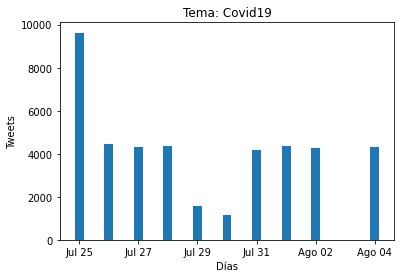

In [141]:
# Creamos un arreglo almacenando los valores obtenidos de la cantidad de tweets sobre el Covid19

covid = [len(dataframecovid_25jul), len(dataframecovid_26jul), len(dataframecovid_27jul), len(dataframecovid_28jul), len(dataframecovid_29jul), len(dataframecovid_30jul), len(dataframecovid_31jul), len(dataframecovid_01ago), len(dataframecovid_02ago), len(dataframecovid_03ago), len(dataframecovid_04ago)]
print(covid)

# Hacemos un histograma de los valores obtenidos

tiempo = np.arange(len(covid))
esp = 0.3

fix, ax = plt.subplots()
ax.bar(tiempo, covid, esp)
ax.set_title("Tema: Covid19")
ax.set_xlabel("Días")
ax.set_ylabel("Tweets")
ax.set_xticklabels(dias)

[345, 150, 158, 121, 53, 40, 137, 160, 135, 0, 107]


<ipython-input-157-74aada88163b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dias)


[Text(-2.0, 0, ' '),
 Text(0.0, 0, 'Jul 25'),
 Text(2.0, 0, 'Jul 27'),
 Text(4.0, 0, 'Jul 29'),
 Text(6.0, 0, 'Jul 31'),
 Text(8.0, 0, 'Ago 02'),
 Text(10.0, 0, 'Ago 04'),
 Text(12.0, 0, '')]

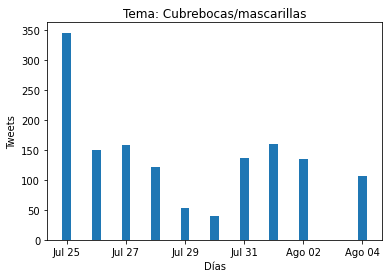

In [157]:
# Creamos un arreglo almacenando los valores obtenidos de la cantidad de tweets sobre los cubrebocas/mascarillas

mask = [len(dataframemask_25jul), len(dataframemask_26jul), len(dataframemask_27jul), len(dataframemask_28jul), len(dataframemask_29jul), len(dataframemask_30jul), len(dataframemask_31jul), len(dataframemask_01ago), len(dataframemask_02ago), len(dataframemask_03ago), len(dataframemask_04ago)]
print(mask)

# Hacemos un histograma de los valores obtenidos

tiempo = np.arange(len(mask))
esp = 0.3

fix, ax = plt.subplots()
ax.bar(tiempo, mask, esp)
ax.set_title("Tema: Cubrebocas/mascarillas")
ax.set_xlabel("Días")
ax.set_ylabel("Tweets")
ax.set_xticklabels(dias)

[206, 103, 110, 136, 40, 68, 118, 132, 146, 0, 152]


<ipython-input-172-5f33d8dd558d>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dias)


[Text(-2.0, 0, ' '),
 Text(0.0, 0, 'Jul 25'),
 Text(2.0, 0, 'Jul 27'),
 Text(4.0, 0, 'Jul 29'),
 Text(6.0, 0, 'Jul 31'),
 Text(8.0, 0, 'Ago 02'),
 Text(10.0, 0, 'Ago 04'),
 Text(12.0, 0, '')]

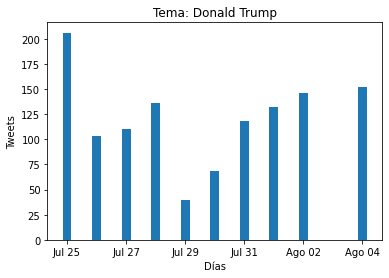

In [172]:
# Creamos un arreglo almacenando los valores obtenidos de la cantidad de tweets sobre Donald Trump

trump = [len(dataframetrump_25jul), len(dataframetrump_26jul), len(dataframetrump_27jul), len(dataframetrump_28jul), len(dataframetrump_29jul), len(dataframetrump_30jul), len(dataframetrump_31jul), len(dataframetrump_01ago), len(dataframetrump_02ago), len(dataframetrump_03ago), len(dataframetrump_04ago)]
print(trump)

# Hacemos un histograma de los valores obtenidos

tiempo = np.arange(len(trump))
esp = 0.3

fix, ax = plt.subplots()
ax.bar(tiempo, trump, esp)
ax.set_title("Tema: Donald Trump")
ax.set_xlabel("Días")
ax.set_ylabel("Tweets")
ax.set_xticklabels(dias)

##Conclusiones

A partir de los tres histogramas obtenidos, podemos concluir que la popularidad de los tres temas más relevantes tuvo su nivel más alto el día 25 de julio de 2020. Posteriormente, se observa un descenso de popularidad de los tres temas alrededor del 29 o 30 de julio. Y finalmente, la gente vuelve a hablar de estos temas en los días posteriores hasta el 04 de agosto de 2020.

Puedo decir que mi objetivo principal de este análisis de datos se cumplió satisfactiriamente, puesto que se determinó adecuadamente qué temas fueron los más relevantes durante estos días mediante los hashtags, y se pudo determinar cómo fue fluctuando la popularidad de cada uno en el transcurso de todos los días esta base de datos.

Adicionalmente, es posible vincular una noticia o acontecimiento importante con el punto de popularidad máximo de cada uno de los tres temas (el cual es el mismo día, el 25 de julio de 2020).